# Weeaboo Subsite Overview

## Preliminary Preparations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

import json
import yaml
import ast

import requests
import IPython.display as Disp

from re import findall
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [3]:
weeaboo_origin = pd.read_csv(PATH + 'data_weeaboo.csv', index_col=0)
weeaboo_origin.reset_index(inplace=True)
weeaboo_origin.drop(columns=['index'], inplace=True)
weeaboo_origin.head()

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   

                                              author  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...   

                                              badges  commentsCount  \
0  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...             31   
1  [{'type': 'top', 'text': 'Saher', 'background'...              0   
2  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...              0   
3  [{'type': 'top', 'text': 'Just No Chill', 'bac...             12   
4  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...              7   

   commentsSeenCount  favoritesCount  \
0                NaN               5   
1                NaN               0   
2                NaN               3   
3                NaN               2   
4                NaN               3   

                                               cover        date  \
0  {'additionalData': {'size': 255539, 'type': 'p...  1614231819   
1  {'additionalData': {'size': 756777, 'type': 'j...  1614433374   
2  {'additionalData': {'size': 354581, 'type': 'j...  1614435131   
3  {'additionalData': {'size': 316243, 'type': 'p...  1614426885   
4  {'additionalData': {'size': 89782, 'type': 'jp...  1614425322   

                           dateRFC  ...  is_show_thanks  is_still_updating  \
0  Thu, 25 Feb 2021 08:43:39 +0300  ...           False              False   
1  Sat, 27 Feb 2021 16:42:54 +0300  ...           False              False   
2  Sat, 27 Feb 2021 17:12:11 +0300  ...           False              False   
3  Sat, 27 Feb 2021 14:54:45 +0300  ...           False              False   
4  Sat, 27 Feb 2021 14:28:42 +0300  ...           False              False   

   is_filled_by_editors isEditorial  audioUrl  hotness      commentEditor  \
0                 False       False       NaN        0  {'enabled': True}   
1                 False       False       NaN        0  {'enabled': True}   
2                 False       False       NaN        0  {'enabled': True}   
3                 False       False       NaN        0  {'enabled': True}   
4                 False       False       NaN        0  {'enabled': True}   

                                           summarize  \
0  –ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –ú–∞—ë–π –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ –º–ª–∞–¥—à–µ–∫–ª...   
1                         #anime  #gochiusa  #kirara   
2                               –ê–≤—Ç–æ—Ä:  #rasp  #nsfw   
3  17.02.21 Soviet Games –≤—ã–ª–æ–∂–∏–ª–∏ –ø–æ—Å—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º...   
4                                      #–≤–∏–∞–±—É  #–º–µ–º—ã   

                                              repost stackedRepostsAuthors  
0                                                NaN                   NaN  
1  {'author': {'id': 261696, 'url': 'https://dtf....                    []  
2                                                NaN                   NaN  
3  {'author': {'id': 261696, 'url': 'https://dtf....                    []  
4                                                NaN                   NaN  

[5 rows x 43 columns]

In [4]:
weeaboo_origin.tail(3)

id                                                url  \
6135  170958                     https://dtf.ru/s/weaboo/170958   
6136  170948                     https://dtf.ru/s/weaboo/170948   
6137  170920  https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...   

                                                 author  \
6135  {'id': 197370, 'url': 'https://dtf.ru/u/197370...   
6136  {'id': 92674, 'url': 'https://dtf.ru/u/92674-a...   
6137  {'id': 212847, 'url': 'https://dtf.ru/u/212847...   

                                                 badges  commentsCount  \
6135  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...              8   
6136  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...              6   
6137  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...             40   

      commentsSeenCount  favoritesCount  \
6135                NaN               1   
6136                NaN               1   
6137                NaN               4   

                                                  cover        date  \
6135  {'additionalData': {'size': 2761663, 'type': '...  1594749437   
6136  {'additionalData': {'size': 5588717, 'type': '...  1594748952   
6137  {'additionalData': {'size': 287640, 'type': 'j...  1594746603   

                              dateRFC  ...  is_show_thanks  is_still_updating  \
6135  Tue, 14 Jul 2020 20:57:17 +0300  ...           False              False   
6136  Tue, 14 Jul 2020 20:49:12 +0300  ...           False              False   
6137  Tue, 14 Jul 2020 20:10:03 +0300  ...           False              False   

      is_filled_by_editors isEditorial  audioUrl  hotness      commentEditor  \
6135                 False       False       NaN        0  {'enabled': True}   
6136                 False       False       NaN        0  {'enabled': True}   
6137                 False       False       NaN        0  {'enabled': True}   

                                              summarize  repost  \
6135         –ì–æ–≤–æ—Ä–æ–≤ –∫—Ä–∞—Å–∞–≤–∞, —Å–ø–∞—Å–∏–±–æ –∑–∞ –∞–Ω–∏–º–µ–º—ã –Ω–∞ –¥—Ç—Ñ     NaN   
6136  –ò–Ω–∞—á–µ —è –≤ –î—Ä–∞–º–µ –∑–∞–ø–æ—Å—â—É –∫–∞–∫ –æ–Ω–∏ –¥–æ –º–µ–Ω—è –¥–æ–º–æ–≥–∞...     NaN   
6137  –ï—â–µ –æ–¥–∏–Ω –º–µ—Ä—Ç–≤—ã–π –ø–æ–¥—Å–∞–π—Ç, –Ω–æ –∑–∞—Ç–æ —Å –∞–Ω–∏–º–µ –í–º–µ—Å...     NaN   

     stackedRepostsAuthors  
6135                   NaN  
6136                   NaN  
6137                   NaN  

[3 rows x 43 columns]

In [5]:
weeaboo_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6138 non-null   int64  
 1   url                     6138 non-null   object 
 2   author                  6138 non-null   object 
 3   badges                  6138 non-null   object 
 4   commentsCount           6138 non-null   int64  
 5   commentsSeenCount       0 non-null      float64
 6   favoritesCount          6138 non-null   int64  
 7   cover                   5979 non-null   object 
 8   date                    6138 non-null   int64  
 9   dateRFC                 6138 non-null   object 
 10  date_favorite           0 non-null      float64
 11  last_modification_date  6138 non-null   int64  
 12  hitsCount               6138 non-null   int64  
 13  intro                   3445 non-null   object 
 14  introInFeed             0 non-null      

**–ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –ø–æ–ª–µ–∑–Ω–æ:**
- id -- –ò–î —Å—Ç–∞—Ç—å–∏ –≤ –±–∞–∑–µ, –∏–Ω–∫—Ä–µ–º–µ–Ω—Ç–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä
- url -- —Å—Å—ã–ª–∫–∞ –Ω–∞ —Å—Ç–∞—Ç—å—é
- author -- –∞–≤—Ç–æ—Ä: —Å–ª–æ–≤–∞—Ä—å —Å –¥–∞–Ω–Ω—ã–º–∏, –Ω—É–∂–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞
- commentsCount -- –∫–æ–ª-–≤–æ –∫–æ–º–º–µ–Ω—Ç–æ–≤
- favoritesCount -- –∫–æ–ª-–≤–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–π –≤ –∑–∞–∫–ª–∞–¥–∫–∏
- cover -- —ç—Ç–æ –ö–ü–î–í (–Ω—É–∂–Ω–æ –ª–∏?)
- date -- unix timestamp
- dateRFC -- —á–µ–ª–æ–≤–µ–∫–æ—á–∏—Ç–∞–µ–º–æ–µ –≤—Ä–µ–º—è, UTC+3
- hitsCount -- –ø—Ä–æ—Å–º–æ—Ç—Ä—ã
- isRepost -- –±–∏–Ω–∞—Ä–Ω—ã–π –º–∞—Ä–∫–µ—Ä —Ä–µ–ø–æ—Å—Ç–∞
- likes -- –ª–∞–π–∫–∏: —Å–ª–æ–≤–∞—Ä—å, –Ω—É–∂–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞
- subsite -- –ø–æ–¥—Å–∞–π—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º –æ–ø—É–±–ª–∏–∫–æ–≤–∞–Ω –æ—Ä–∏–≥–∏–Ω–∞–ª —Å—Ç–∞—Ç—å–∏
- title -- –∑–∞–≥–æ–ª–æ–≤–æ–∫
- type -- —Ç–∏–ø —Å—Ç–∞—Ç—å–∏ 
- entryContent -- —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–æ—Å—Ç–∞
- repost -- –ø–æ–¥—Å–∞–π—Ç –∏–∑ –∫–æ—Ç–æ—Ä–æ–≥–æ —Å–¥–µ–ª–∞–Ω —Ä–µ–ø–æ—Å—Ç: —Å–ª–æ–≤–∞—Ä—å, –Ω—É–∂–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞
- stackedRepostsAuthors -- —Ä–µ–ø–æ—Å—Ç–Ω—É–≤—à–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏/–ø–æ–¥—Å–∞–π—Ç—ã - —Å–ø–∏—Å–æ–∫
- blocks -- —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–æ—Å—Ç–∞ –ø–æ–±–ª–æ—á–Ω–æ. 
- summarize -- –ø–æ—Å–ª–µ–¥–Ω–∏–π –∞–±–∑–∞—Ü/—Ä–µ–∑—é–º–∏—Ä—É—é—â–∏–π –∞–±–∑–∞—Ü - –≤–∏–¥–∏–º–æ, –Ω–µ–∫–∞—è —Ñ–∏—á–∞ —Ä–µ–¥–∞–∫—Ç–æ—Ä–∞

## Data Preprocessing

In [6]:
date_parser = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df = pd.read_csv(PATH + "data_weeaboo.csv", parse_dates=['date'], date_parser=date_parser, index_col=None, # None / 0 / ['date']
                   usecols=['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date', 
                            'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 
                            'repost', 'stackedRepostsAuthors', 'blocks'])
df.head()

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   

                                              author  commentsCount  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   

   favoritesCount                date  hitsCount  isRepost  \
0               5 2021-02-25 08:43:39        642     False   
1               0 2021-02-27 16:42:54          3      True   
2               3 2021-02-27 17:12:11         24     False   
3               2 2021-02-27 14:54:45        174      True   
4               3 2021-02-27 14:28:42        131     False   

                                               likes  \
0  {'is_liked': 0, 'count': 34, 'summ': 34, 'is_h...   
1  {'is_liked': 0, 'count': 3, 'summ': 3, 'is_hid...   
2  {'is_liked': 0, 'count': 10, 'summ': 10, 'is_h...   
3  {'is_liked': 0, 'count': 17, 'summ': 17, 'is_h...   
4  {'is_liked': 0, 'count': 38, 'summ': 38, 'is_h...   

                                             subsite  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...   
2  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...   
4  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   

                                               title  type  \
0                              –ì–ª–∞–≤–Ω–∞—è –¥–µ–≤–æ—á–∫–∞ –º–∞—Ä—Ç–∞     1   
1                                                NaN     1   
2  RASP/33 –ü–æ–¥–±–æ—Ä–∫–∞ —Ä–∞–±–æ—Ç –∞–≤—Ç–æ—Ä–∞ Matthew „ÉªNekomim...     1   
3  –°–≤–µ—Ç –≤ –∫–æ–Ω—Ü–µ —Ç—É–Ω–Ω–µ–ª—è. –õ—é–±–æ–≤—å, –î–µ–Ω—å–≥–∏, –†–æ–∫-–Ω-–†–æ–ª–ª!     1   
4                                                NaN     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'media', 'data': {'items': [{'title'...   

                                              repost stackedRepostsAuthors  
0                                                NaN                   NaN  
1  {'author': {'id': 261696, 'url': 'https://dtf....                    []  
2                                                NaN                   NaN  
3  {'author': {'id': 261696, 'url': 'https://dtf....                    []  
4                                                NaN                   NaN

In [8]:
df.shape

(6138, 15)

–ù—É–∂–Ω–æ:
- id
- url
- author -- –∞–≤—Ç–æ—Ä: —Å–ª–æ–≤–∞—Ä—å —Å –¥–∞–Ω–Ω—ã–º–∏, –Ω—É–∂–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞
- commentsCount -- –∫–æ–ª-–≤–æ –∫–æ–º–º–µ–Ω—Ç–æ–≤
- favoritesCount -- –∫–æ–ª-–≤–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–π –≤ –∑–∞–∫–ª–∞–¥–∫–∏
- date -- unix timestamp
- dateRFC -- —á–µ–ª–æ–≤–µ–∫–æ—á–∏—Ç–∞–µ–º–æ–µ –≤—Ä–µ–º—è, UTC+3
- hitsCount -- –ø—Ä–æ—Å–º–æ—Ç—Ä—ã
- isRepost -- –±–∏–Ω–∞—Ä–Ω—ã–π –º–∞—Ä–∫–µ—Ä —Ä–µ–ø–æ—Å—Ç–∞
- likes -- –ª–∞–π–∫–∏, —Å–ª–æ–≤–∞—Ä—å, –Ω—É–∂–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞
- subsite -- –ø–æ–¥—Å–∞–π—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º –æ–ø—É–±–ª–∏–∫–æ–≤–∞–Ω –æ—Ä–∏–≥–∏–Ω–∞–ª —Å—Ç–∞—Ç—å–∏
- title -- –∑–∞–≥–æ–ª–æ–≤–æ–∫
- type -- —Ç–∏–ø —Å—Ç–∞—Ç—å–∏ 
- repost -- –ø–æ–¥—Å–∞–π—Ç –∏–∑ –∫–æ—Ç–æ—Ä–æ–≥–æ —Å–¥–µ–ª–∞–Ω —Ä–µ–ø–æ—Å—Ç, —Å–ª–æ–≤–∞—Ä—å, –Ω—É–∂–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞
- stackedRepostsAuthors -- —Ä–µ–ø–æ—Å—Ç–Ω—É–≤—à–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏/–ø–æ–¥—Å–∞–π—Ç—ã - —Å–ø–∏—Å–æ–∫
- blocks -- —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –ø–æ—Å—Ç–∞ –ø–æ–±–ª–æ—á–Ω–æ. 

–ò–∑–≤–ª–µ—á—ë–º –≤–∏–¥—ã –∫–æ–Ω—Ç–µ–Ω—Ç–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ—Å—è –≤ –ø–æ—Å—Ç–µ.

In [9]:
def get_medias(media):
    """
        Extracting mediacontent types from pd.Series
    """
    medias = []
    for x in media:
        medias.append(x['type'])
    return(set(medias))    

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ª–∞–π–∫–∏, –∞–≤—Ç–æ—Ä–∞ –∏ –ø–æ–¥—Å–∞–π—Ç –≤ —É–¥–æ–±–æ—á–∏—Ç–∞–µ–º—ã–π —Ñ–æ—Ä–º–∞—Ç.

In [10]:
df['likes'] = df['likes'].apply(lambda x: ast.literal_eval(x))
df['likes'] = df['likes'].apply(lambda x: x.get('summ'))

medias = df.loc[:, 'blocks']
medias_resume_list = medias.apply(lambda x: ast.literal_eval(x))
df['media_content_types'] = medias_resume_list.apply(lambda el: get_medias(el))


df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))
df['author_name'] = df['author'].apply(lambda x: x.get('name'))
df['author_type'] = df['author'].apply(lambda x: x.get('type'))
df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))

df['subsite'] = df['subsite'].apply(lambda x: ast.literal_eval(x))
df['subsite'] = df['subsite'].apply(lambda x: x.get('name'))

In [11]:
df.head()

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   

                                              author  commentsCount  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   

   favoritesCount                date  hitsCount  isRepost  likes  \
0               5 2021-02-25 08:43:39        642     False     34   
1               0 2021-02-27 16:42:54          3      True      3   
2               3 2021-02-27 17:12:11         24     False     10   
3               2 2021-02-27 14:54:45        174      True     17   
4               3 2021-02-27 14:28:42        131     False     38   

         subsite                                              title  type  \
0          –í–∏–∞–±—É                              –ì–ª–∞–≤–Ω–∞—è –¥–µ–≤–æ—á–∫–∞ –º–∞—Ä—Ç–∞     1   
1          Saher                                                NaN     1   
2          –í–∏–∞–±—É  RASP/33 –ü–æ–¥–±–æ—Ä–∫–∞ —Ä–∞–±–æ—Ç –∞–≤—Ç–æ—Ä–∞ Matthew „ÉªNekomim...     1   
3  Just No Chill  –°–≤–µ—Ç –≤ –∫–æ–Ω—Ü–µ —Ç—É–Ω–Ω–µ–ª—è. –õ—é–±–æ–≤—å, –î–µ–Ω—å–≥–∏, –†–æ–∫-–Ω-–†–æ–ª–ª!     1   
4          –í–∏–∞–±—É                                                NaN     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'media', 'data': {'items': [{'title'...   

                                              repost stackedRepostsAuthors  \
0                                                NaN                   NaN   
1  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
2                                                NaN                   NaN   
3  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
4                                                NaN                   NaN   

                            media_content_types    author_name  author_type  \
0  {delimiter, media, quiz, text, list, header}          –í–∏–∞–±—É            2   
1                                 {media, text}          Saher            1   
2                           {media, text, link}      it hurts.            1   
3                          {media, text, incut}  Just No Chill            1   
4                                 {media, text}     Over9k5000            1   

                                   author_avatar_url  
0  https://leonardo.osnova.io/cb2d9d10-284b-5b36-...  
1  https://leonardo.osnova.io/9d381161-d030-561c-...  
2  https://leonardo.osnova.io/3d85a2af-3745-5c08-...  
3  https://leonardo.osnova.io/199de206-2dfc-57ee-...  
4  https://leonardo.osnova.io/5dded09e-5816-5b52-...

---
### –ü—Ä–æ–≤–µ–¥—ë–º —Ç–µ—Å—Ç—ã –Ω–∞ –Ω–µ–±–æ–ª—å—à–æ–º –∫—É—Å–æ—á–∫–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
---

In [12]:
df_subs = df.loc[0:5, :]
df_subs

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   
5  656238            https://dtf.ru/s/weaboo/656238-soglasny   

                                              author  commentsCount  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   
5  {'id': 154947, 'url': 'https://dtf.ru/u/154947...              9   

   favoritesCount                date  hitsCount  isRepost  likes  \
0               5 2021-02-25 08:43:39        642     False     34   
1               0 2021-02-27 16:42:54          3      True      3   
2               3 2021-02-27 17:12:11         24     False     10   
3               2 2021-02-27 14:54:45        174      True     17   
4               3 2021-02-27 14:28:42        131     False     38   
5               7 2021-02-27 13:35:10        157     False     26   

         subsite                                              title  type  \
0          –í–∏–∞–±—É                              –ì–ª–∞–≤–Ω–∞—è –¥–µ–≤–æ—á–∫–∞ –º–∞—Ä—Ç–∞     1   
1          Saher                                                NaN     1   
2          –í–∏–∞–±—É  RASP/33 –ü–æ–¥–±–æ—Ä–∫–∞ —Ä–∞–±–æ—Ç –∞–≤—Ç–æ—Ä–∞ Matthew „ÉªNekomim...     1   
3  Just No Chill  –°–≤–µ—Ç –≤ –∫–æ–Ω—Ü–µ —Ç—É–Ω–Ω–µ–ª—è. –õ—é–±–æ–≤—å, –î–µ–Ω—å–≥–∏, –†–æ–∫-–Ω-–†–æ–ª–ª!     1   
4          –í–∏–∞–±—É                                                NaN     1   
5          –í–∏–∞–±—É                                          –°–æ–≥–ª–∞—Å–Ω—ã?     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'media', 'data': {'items': [{'title'...   
5  [{'type': 'text', 'data': {'text': '–£–∑–Ω–∞–ª–∏?', ...   

                                              repost stackedRepostsAuthors  \
0                                                NaN                   NaN   
1  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
2                                                NaN                   NaN   
3  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
4                                                NaN                   NaN   
5                                                NaN                   NaN   

                            media_content_types    author_name  author_type  \
0  {delimiter, media, quiz, text, list, header}          –í–∏–∞–±—É            2   
1                                 {media, text}          Saher            1   
2                           {media, text, link}      it hurts.            1   
3                          {media, text, incut}  Just No Chill            1   
4                                 {media, text}     Over9k5000            1   
5                                 {media, text}           Koda            1   

                                   author_avatar_url  
0  https://leonardo.osnova.io/cb2d9d10-284b-5b36-...  
1  https://leonardo.osnova.io/9d381161-d030-561c-...  
2  https://leonardo.osnova.io/3d85a2af-3745-5c08-...  
3  https://leonardo.osnova.io/199de206-2dfc-57ee-...  
4  https://leonardo.osnova.io/5dded09e-5816-5b52-...  
5  https://leonardo.osnova.io/c29d8c44-0073-48cc-...

In [13]:
df_subs['media_content_types']

0    {delimiter, media, quiz, text, list, header}
1                                   {media, text}
2                             {media, text, link}
3                            {media, text, incut}
4                                   {media, text}
5                                   {media, text}
Name: media_content_types, dtype: object

–°–æ–∑–¥–∞—ë–º –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å —Å–∞–º—ã–º–∏ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–º–∏ —Ç–∏–ø–∞–º–∏ –∫–æ–Ω—Ç–µ–Ω—Ç–∞ –≤ —Å—Ç–∞—Ç—å—è—Ö. –û—Å—Ç–∞–ª—å–Ω–æ–µ –±—É–¥–µ–º –æ—Ç–ª–∞–≤–ª–∏–≤–∞—Ç—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ.

In [14]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote"}

In [15]:
df_subs.loc[:, 'exotic_media_type'] = df_subs.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df_subs.loc[:, 'exotic_media_type'] = df_subs['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


In [16]:
df_subs['exotic_media_type'].explode().unique() 

array(['quiz', 0, 'incut'], dtype=object)

In [17]:
df_subs

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   
5  656238            https://dtf.ru/s/weaboo/656238-soglasny   

                                              author  commentsCount  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   
5  {'id': 154947, 'url': 'https://dtf.ru/u/154947...              9   

   favoritesCount                date  hitsCount  isRepost  likes  \
0               5 2021-02-25 08:43:39        642     False     34   
1               0 2021-02-27 16:42:54          3      True      3   
2               3 2021-02-27 17:12:11         24     False     10   
3               2 2021-02-27 14:54:45        174      True     17   
4               3 2021-02-27 14:28:42        131     False     38   
5               7 2021-02-27 13:35:10        157     False     26   

         subsite                                              title  type  \
0          –í–∏–∞–±—É                              –ì–ª–∞–≤–Ω–∞—è –¥–µ–≤–æ—á–∫–∞ –º–∞—Ä—Ç–∞     1   
1          Saher                                                NaN     1   
2          –í–∏–∞–±—É  RASP/33 –ü–æ–¥–±–æ—Ä–∫–∞ —Ä–∞–±–æ—Ç –∞–≤—Ç–æ—Ä–∞ Matthew „ÉªNekomim...     1   
3  Just No Chill  –°–≤–µ—Ç –≤ –∫–æ–Ω—Ü–µ —Ç—É–Ω–Ω–µ–ª—è. –õ—é–±–æ–≤—å, –î–µ–Ω—å–≥–∏, –†–æ–∫-–Ω-–†–æ–ª–ª!     1   
4          –í–∏–∞–±—É                                                NaN     1   
5          –í–∏–∞–±—É                                          –°–æ–≥–ª–∞—Å–Ω—ã?     1   

                                              blocks  \
0  [{'type': 'media', 'data': {'items': [{'title'...   
1  [{'type': 'media', 'data': {'items': [{'title'...   
2  [{'type': 'media', 'data': {'items': [{'title'...   
3  [{'type': 'media', 'data': {'items': [{'title'...   
4  [{'type': 'media', 'data': {'items': [{'title'...   
5  [{'type': 'text', 'data': {'text': '–£–∑–Ω–∞–ª–∏?', ...   

                                              repost stackedRepostsAuthors  \
0                                                NaN                   NaN   
1  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
2                                                NaN                   NaN   
3  {'author': {'id': 261696, 'url': 'https://dtf....                    []   
4                                                NaN                   NaN   
5                                                NaN                   NaN   

                            media_content_types    author_name  author_type  \
0  {delimiter, media, quiz, text, list, header}          –í–∏–∞–±—É            2   
1                                 {media, text}          Saher            1   
2                           {media, text, link}      it hurts.            1   
3                          {media, text, incut}  Just No Chill            1   
4                                 {media, text}     Over9k5000            1   
5                                 {media, text}           Koda            1   

                                   author_avatar_url exotic_media_type  
0  https://leonardo.osnova.io/cb2d9d10-284b-5b36-...            {quiz}  
1  https://leonardo.osnova.io/9d381161-d030-561c-...                 0  
2  https://leonardo.osnova.io/3d85a2af-3745-5c08-...                 0  
3  https://leonardo.osnova.io/199de206-2dfc-57ee-...           {incut}  
4  https://leonardo.osnova.io/5dded09e-5816-5b52-...         

–ü—Ä–æ–∏–∑–≤–µ–¥—ë–º —Ä–∞—Å—á—ë—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∏–º–≤–æ–ª–æ–≤, —Å–ª–æ–≤, —Ö—ç—à-—Ç—ç–≥–æ–≤, –∞ —Ç–∞–∫–∂–µ –º–µ–¥–∏–∞–∫–æ–Ω—Ç–µ–Ω—Ç–∞, —Å–æ–¥–µ—Ä–∂–∞—â–µ–≥–æ—Å—è –≤ —Å—Ç–∞—Ç—å—è—Ö.

–†–∞—Å—á—ë—Ç –Ω–µ –æ—á–µ–Ω—å —Ç–æ—á–Ω—ã–π, –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç –ø–æ–¥–ø–∏—Å–∏ –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –∏ –≤–∏–¥–µ–æ, –∞ —Ç–∞–∫–∂–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ —Ç–≤–∏—Ç–æ–≤ –∏ —Å—Å—ã–ª–æ–∫ –Ω–∞ —Ç–µ–ª–µ–≥—Ä–∞–º. 

–°—Å—ã–ª–∫–∏ –Ω–∞ —Ç–≤–∏—Ç—Ç–µ—Ä, —Ç–µ–ª–µ–≥—Ä–∞–º –∏ –ø—Ä–æ—á–∏–µ –∏—Å—Ç–æ—á–Ω–∏–∫–∏ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –∫–∞–∫ –æ–¥–∏–Ω —Ç–∏–ø.

–¢–∞–∫–∂–µ –≤–∏–¥–∂–µ—Ç –∏–Ω—Å—Ç–∞–≥—Ä–∞–º–∞ —É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∫–∞–∫ –æ–¥–Ω–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≥–∞–ª–µ—Ä–µ–µ. –≠—Ç–æ –≤—ã–∑–≤–∞–Ω–æ —Ç–µ–º, —á—Ç–æ API –û—á–æ–±—ã –Ω–µ –æ—Ç–¥–∞—ë—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–∏–ø–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–≥–æ –≤–∏–¥–∂–µ—Ç–∞.

In [18]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [19]:
df_subs.apply(lambda row: stats_counter(row), axis=1)

0    (5650, 700, 9, 0, 0, [#Tanya-Degurshaff), #Ren...
1       (25, 3, 3, 0, 0, [#anime, #gochiusa, #kirara])
2                     (18, 3, 7, 0, 1, [#rasp, #nsfw])
3                               (341, 49, 4, 0, 0, [])
4                    (13, 2, 1, 0, 0, [#–≤–∏–∞–±—É, #–º–µ–º—ã])
5                                  (7, 1, 1, 0, 0, [])
dtype: object

https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply

https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

In [20]:
df_subs[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df_subs.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_subs.loc[2, :]

id                                                                  656373
url                      https://dtf.ru/s/weaboo/656373-rasp-33-podbork...
author                   {'id': 262818, 'url': 'https://dtf.ru/u/262818...
commentsCount                                                            0
favoritesCount                                                           3
date                                                   2021-02-27 17:12:11
hitsCount                                                               24
isRepost                                                             False
likes                                                                   10
subsite                                                              –í–∏–∞–±—É
title                    RASP/33 –ü–æ–¥–±–æ—Ä–∫–∞ —Ä–∞–±–æ—Ç –∞–≤—Ç–æ—Ä–∞ Matthew „ÉªNekomim...
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...

In [22]:
df_subs

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   
5  656238            https://dtf.ru/s/weaboo/656238-soglasny   

                                              author  commentsCount  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   
5  {'id': 154947, 'url': 'https://dtf.ru/u/154947...              9   

   favoritesCount                date  hitsCount  isRepost  likes  \
0               5 2021-02-25 08:43:39        642     False     34   
1               0 2021-02-27 16:42:54          3      True      3   
2               3 2021-02-27 17:12:11         24     False     10   
3               2 2021-02-27 14:54:45        174      True     17   
4               3 2021-02-27 14:28:42        131     False     38   
5               7 2021-02-27 13:35:10        157     False     26   

         subsite  ...    author_name  author_type  \
0          –í–∏–∞–±—É  ...          –í–∏–∞–±—É            2   
1          Saher  ...          Saher            1   
2          –í–∏–∞–±—É  ...      it hurts.            1   
3  Just No Chill  ...  Just No Chill            1   
4          –í–∏–∞–±—É  ...     Over9k5000            1   
5          –í–∏–∞–±—É  ...           Koda            1   

                                   author_avatar_url exotic_media_type  \
0  https://leonardo.osnova.io/cb2d9d10-284b-5b36-...            {quiz}   
1  https://leonardo.osnova.io/9d381161-d030-561c-...                 0   
2  https://leonardo.osnova.io/3d85a2af-3745-5c08-...                 0   
3  https://leonardo.osnova.io/199de206-2dfc-57ee-...           {incut}   
4  https://leonardo.osnova.io/5dded09e-5816-5b52-...                 0   
5  https://leonardo.osnova.io/c29d8c44-0073-48cc-...                 0   

  symbols words images  videos links  \
0    5650   700      9       0     0   
1      25     3      3       0     0   
2      18     3      7       0     1   
3     341    49      4       0     0   
4      13     2      1       0     0   
5       7     1      1       0     0   

                                            hashtags  
0  [#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)...  
1                       [#anime, #gochiusa, #kirara]  
2                                     [#rasp, #nsfw]  
3                                                 []  
4                                    [#–≤–∏–∞–±—É, #–º–µ–º—ã]  
5                                                 []  

[6 rows x 26 columns]

---
### –í–æ–∑–≤—Ä–∞—â–∞–µ–º—Å—è –∫ –∏—Å—Ö–æ–¥–Ω–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É –∏ –ø—Ä–∏–º–µ–Ω—è–µ–º —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏
---

In [23]:
df.apply(lambda row: stats_counter(row), axis=1)

0       (5650, 700, 9, 0, 0, [#Tanya-Degurshaff), #Ren...
1          (25, 3, 3, 0, 0, [#anime, #gochiusa, #kirara])
2                        (18, 3, 7, 0, 1, [#rasp, #nsfw])
3                                  (341, 49, 4, 0, 0, [])
4                       (13, 2, 1, 0, 0, [#–≤–∏–∞–±—É, #–º–µ–º—ã])
                              ...                        
6133                                  (0, 0, 1, 0, 0, [])
6134                                  (0, 0, 0, 1, 0, [])
6135                                 (42, 7, 1, 0, 0, [])
6136                               (181, 26, 1, 0, 0, [])
6137                               (118, 22, 1, 0, 0, [])
Length: 6138, dtype: object

In [24]:
df[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

In [25]:
df

id                                                url  \
0     652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1     656374               https://dtf.ru/u/252726-saher/656374   
2     656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3     656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4     656272                     https://dtf.ru/s/weaboo/656272   
...      ...                                                ...   
6133  171001              https://dtf.ru/s/weaboo/171001-satdog   
6134  170996              https://dtf.ru/s/weaboo/170996-milota   
6135  170958                     https://dtf.ru/s/weaboo/170958   
6136  170948                     https://dtf.ru/s/weaboo/170948   
6137  170920  https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...   

                                                 author  commentsCount  \
0     {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1     {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2     {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3     {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4     {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   
...                                                 ...            ...   
6133  {'id': 127404, 'url': 'https://dtf.ru/u/127404...              1   
6134  {'id': 162369, 'url': 'https://dtf.ru/u/162369...              6   
6135  {'id': 197370, 'url': 'https://dtf.ru/u/197370...              8   
6136  {'id': 92674, 'url': 'https://dtf.ru/u/92674-a...              6   
6137  {'id': 212847, 'url': 'https://dtf.ru/u/212847...             40   

      favoritesCount                date  hitsCount  isRepost  likes  \
0                  5 2021-02-25 08:43:39        642     False     34   
1                  0 2021-02-27 16:42:54          3      True      3   
2                  3 2021-02-27 17:12:11         24     False     10   
3                  2 2021-02-27 14:54:45        174      True     17   
4                  3 2021-02-27 14:28:42        131     False     38   
...              ...                 ...        ...       ...    ...   
6133               1 2020-07-14 21:43:51        130     False     20   
6134               1 2020-07-14 21:34:11        106     False     18   
6135               1 2020-07-14 20:57:17        115     False     19   
6136               1 2020-07-14 20:49:12        159     False     24   
6137               4 2020-07-14 20:10:03       1357     False     62   

            subsite  ...                           media_content_types  \
0             –í–∏–∞–±—É  ...  {delimiter, media, quiz, text, list, header}   
1             Saher  ...                                 {media, text}   
2             –í–∏–∞–±—É  ...                           {media, text, link}   
3     Just No Chill  ...                          {media, text, incut}   
4             –í–∏–∞–±—É  ...                                 {media, text}   
...             ...  ...                                           ...   
6133          –í–∏–∞–±—É  ...                                       {media}   
6134          –í–∏–∞–±—É  ...                                       {video}   
6135          –í–∏–∞–±—É  ...                                 {media, text}   
6136          –í–∏–∞–±—É  ...                                 {media, text}   
6137          –í–∏–∞–±—É  ...                                 {media, text}   

            author_name author_type  \
0                 –í–∏–∞–±—É           2   
1                 Saher           1   
2             it hurts.           1   
3         Just No Chill           1   
4            Over9k5000           1   
...                 ...         ...   
6133             –•–∞—Å–∞–≥–∏           1   
6134        Asuka Soryu           1   
6135     Le mort joyeux           1   
6136     Ayan Myrzagali           1   
6137  –ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è           1   

                           

In [26]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote", "tweet"}

In [27]:
df.loc[:, 'exotic_media_type'] = df.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df.loc[:, 'exotic_media_type'] = df['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

In [28]:
df['exotic_media_type'].explode().unique() 

array(['quiz', 0, 'incut', 'spotify', 'audio', 'person', 'warning',
       'instagram'], dtype=object)

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ! –ï—â—ë –µ—Å—Ç—å –∫–∞–∫–∏–µ-—Ç–æ –Ω–µ–æ–±—ã—á–Ω—ã–µ —Ç–∏–ø—ã –º–µ–¥–∏–∞–∫–æ–Ω—Ç–µ–Ω—Ç–∞. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –æ–Ω–∏ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç. 

–û—Å–æ–±–µ–Ω–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã: ```'incut' –∏ 'number'```, –ø–æ—Å–∫–æ–ª—å–∫—É –æ—Å—Ç–∞–ª—å–Ω—ã–µ –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ –ø–æ–Ω—è—Ç–Ω—ã: —Å—Å—ã–ª–∫–∞ –Ω–∞ —á–µ–ª–æ–≤–µ–∫–∞/–∞–≤—Ç–æ—Ä–∞, —Å—Å—ã–ª–∫–∏ –Ω–∞ –∏–Ω—Å—Ç—É, –∞—É–¥–∏–æ—Ñ–∞–π–ª –∏ –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ.

In [29]:
df[df['exotic_media_type'] != 0]

id                                                url  \
0     652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
3     656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
23    655351  https://dtf.ru/music/655351-nujabes-yaponskaya...   
57    654289  https://dtf.ru/s/weaboo/654289-smotrim-konosub...   
58    654434    https://dtf.ru/s/weaboo/654434-podborka-krasoty   
...      ...                                                ...   
5877  174588  https://dtf.ru/s/weaboo/174588-opa-vnutri-nark...   
5881  174556       https://dtf.ru/s/weaboo/174556-grab-his-dick   
5896  174390                 https://dtf.ru/s/weaboo/174390-who   
5924  173966  https://dtf.ru/s/weaboo/173966-vnutri-posmeyat...   
6124  171247  https://dtf.ru/s/weaboo/171247-hayasaka-ved-lu...   

                                                 author  commentsCount  \
0     {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
3     {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
23    {'id': 215354, 'url': 'https://dtf.ru/s/rap', ...              6   
57    {'id': 130392, 'url': 'https://dtf.ru/u/130392...             43   
58    {'id': 130359, 'url': 'https://dtf.ru/u/130359...              8   
...                                                 ...            ...   
5877  {'id': 212847, 'url': 'https://dtf.ru/u/212847...              2   
5881  {'id': 193363, 'url': 'https://dtf.ru/u/193363...              1   
5896  {'id': 197370, 'url': 'https://dtf.ru/u/197370...             11   
5924  {'id': 212847, 'url': 'https://dtf.ru/u/212847...             20   
6124  {'id': 193363, 'url': 'https://dtf.ru/u/193363...             20   

      favoritesCount                date  hitsCount  isRepost  likes  \
0                  5 2021-02-25 08:43:39        642     False     34   
3                  2 2021-02-27 14:54:45        174      True     17   
23                61 2021-02-26 16:20:19        681      True     70   
57                 5 2021-02-25 18:39:21        381     False     30   
58                22 2021-02-25 17:33:20        351     False     45   
...              ...                 ...        ...       ...    ...   
5877               5 2020-07-20 18:56:00        200     False     22   
5881               2 2020-07-20 18:08:16        167     False     11   
5896               2 2020-07-20 13:49:07        152     False      7   
5924               4 2020-07-19 18:30:46        221     False     10   
6124               2 2020-07-15 09:48:17        227     False     10   

            subsite  ...        author_name  author_type  \
0             –í–∏–∞–±—É  ...              –í–∏–∞–±—É            2   
3     Just No Chill  ...      Just No Chill            1   
23           –ú—É–∑—ã–∫–∞  ...      Rap & Hip-Hop            2   
57            –í–∏–∞–±—É  ...      Kurisu Makise            1   
58            –í–∏–∞–±—É  ...            Revendi            1   
...             ...  ...                ...          ...   
5877          –í–∏–∞–±—É  ...  –ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è            1   
5881          –í–∏–∞–±—É  ...             Layben            1   
5896          –í–∏–∞–±—É  ...     Le mort joyeux            1   
5924          –í–∏–∞–±—É  ...  –ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è            1   
6124          –í–∏–∞–±—É  ...             Layben            1   

                                      author_avatar_url symbols words images  \
0     https://leonardo.osnova.io/cb2d9d10-284b-5b36-...    5650   700      9   
3     https://leonardo.osnova.io/199de206-2dfc-57ee-...     341    49      4   
23    https://leonardo.osnova.io/c2a974ad-ebf9-53fc-...    2315   355      2   
57    https://leonardo.osnova.io/20c519c3-d035-5e1b-...    1176   176      5   
58    https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...     297    51     10   
...                                                 ...     ...   ...    ...   
5877  https://leonardo.osnova.io/b6f745b6-3963-56d5-...       0     0      9   
5881  htt

In [30]:
# df.loc[df['exotic_media_type'].isin(['warning'])]

In [31]:
df.loc[[44, 64, 72, 81, 101, 114], ["url", "exotic_media_type"]]

url exotic_media_type
44   https://dtf.ru/cinema/655130-deadline-v-razrab...                 0
64   https://dtf.ru/u/164395-lesnic/654230-shikata-...                 0
72   https://dtf.ru/s/weaboo/651773-rasp-30-podbork...                 0
81   https://dtf.ru/s/weaboo/653566-rika-smotrit-na...                 0
101                     https://dtf.ru/s/weaboo/652711                 0
114                     https://dtf.ru/s/weaboo/652127                 0

In [32]:
df.loc[[44, 64, 72, 81, 101, 114], "url"]

44     https://dtf.ru/cinema/655130-deadline-v-razrab...
64     https://dtf.ru/u/164395-lesnic/654230-shikata-...
72     https://dtf.ru/s/weaboo/651773-rasp-30-podbork...
81     https://dtf.ru/s/weaboo/653566-rika-smotrit-na...
101                       https://dtf.ru/s/weaboo/652711
114                       https://dtf.ru/s/weaboo/652127
Name: url, dtype: object

In [33]:
ma_alter = df.loc[101, :]
ma_alter

id                                                                  652711
url                                         https://dtf.ru/s/weaboo/652711
author                   {'id': 107553, 'url': 'https://dtf.ru/u/107553...
commentsCount                                                           13
favoritesCount                                                           9
date                                                   2021-02-24 00:15:17
hitsCount                                                              411
isRepost                                                             False
likes                                                                   30
subsite                                                              –í–∏–∞–±—É
title                                                                  NaN
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost              

In [34]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
1
[{'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '6410f337-5682-5509-8d6a-1b858a206fe3', 'width': 1029, 'height': 1280, 'size': 261082, 'type': 'jpg', 'color': 'e3e3e3', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}]


In [35]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '6410f337-5682-5509-8d6a-1b858a206fe3', 'width': 1029, 'height': 1280, 'size': 261082, 'type': 'jpg', 'color': 'e3e3e3', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}


{'media'}


In [36]:
for element in ma_alter_res_list:
    if element['type'] in ['number']:
        print(len(element['data']['title'].split()))
        print('asd')

In [37]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
            
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ —Ç–≤–∏—Ç–∞—Ö –æ–≥—Ä–æ–º–Ω–æ–µ, –≤—ã–≤–æ–¥–∏—Ç—å –Ω–µ —Å—Ç–æ–∏—Ç
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



{'type': 'image', 'data': {'uuid': '6410f337-5682-5509-8d6a-1b858a206fe3', 'width': 1029, 'height': 1280, 'size': 261082, 'type': 'jpg', 'color': 'e3e3e3', 'hash': '', 'external_service': []}}

RESUME: 
Symbols total = 0 
Words total = 0 
MediaContent TYPE:MEDIA = 1 
MediaContent TYPE:LINKS = 0


# –î–æ–±–∞–≤–∏—Ç—å NUMER, INCUT, –ø–æ–¥–ø–∏—Å–∏ –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –∏ –≤–∏–¥–µ–æ –≤ —Ñ—É–Ω–∫—Ü–∏—é!

In [38]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header', 'incut']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1
                symbols_by_block.append(len(elem['title']))
                words_by_block.append(len(elem['title'].split())) 
                
        if element['type'] == 'instagram': 
            image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [39]:
df_subs.loc[4, :]

id                                                                  656272
url                                         https://dtf.ru/s/weaboo/656272
author                   {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...
commentsCount                                                            7
favoritesCount                                                           3
date                                                   2021-02-27 14:28:42
hitsCount                                                              131
isRepost                                                             False
likes                                                                   38
subsite                                                              –í–∏–∞–±—É
title                                                                  NaN
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost              

In [40]:
ma_alter = df_subs.loc[4, :]

In [41]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
2
[{'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'aa3eb9da-4b30-50bf-b717-6644a1c9f05b', 'width': 700, 'height': 1011, 'size': 89782, 'type': 'jpg', 'color': 'e0c9c5', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}, {'type': 'text', 'data': {'text': '\\#–≤–∏–∞–±—É #–º–µ–º—ã', 'text_truncated': '<<<same>>>'}, 'cover': False, 'anchor': ''}]


In [42]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'aa3eb9da-4b30-50bf-b717-6644a1c9f05b', 'width': 700, 'height': 1011, 'size': 89782, 'type': 'jpg', 'color': 'e0c9c5', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}

Number of block = 2, 
Content = {'type': 'text', 'data': {'text': '\\#–≤–∏–∞–±—É #–º–µ–º—ã', 'text_truncated': '<<<same>>>'}, 'cover': False, 'anchor': ''}


{'media', 'text'}


In [43]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
    
    if element['type'] == 'video':
#         video_counter += 1
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
    
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ —Ç–≤–∏—Ç–∞—Ö –æ–≥—Ä–æ–º–Ω–æ–µ, –≤—ã–≤–æ–¥–∏—Ç—å –Ω–µ —Å—Ç–æ–∏—Ç
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



{'type': 'image', 'data': {'uuid': 'aa3eb9da-4b30-50bf-b717-6644a1c9f05b', 'width': 700, 'height': 1011, 'size': 89782, 'type': 'jpg', 'color': 'e0c9c5', 'hash': '', 'external_service': []}}

Symbols = 13, 
Words = 2, 
Text: \#–≤–∏–∞–±—É #–º–µ–º—ã

RESUME: 
Symbols total = 13 
Words total = 2 
MediaContent TYPE:MEDIA = 1 
MediaContent TYPE:LINKS = 0


# Exploratory Data Analysis

–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è

–ß—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –∏–ª–∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å?

- –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: –ª–∞–π–∫–∏, –∫–æ–ª-–≤–æ –º–µ–¥–∏–∞–∫–æ–Ω—Ç–µ–Ω—Ç–∞, –ø—Ä–æ—Å–º–æ—Ç—Ä—ã, –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏

- –ü–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –≤–µ–ª–∏—á–∏–Ω–∞–º–∏

- –ü–æ—Å—á–∏—Ç–∞—Ç—å –±–∞–∑–æ–≤—ã–µ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ, —Å—Ä–µ–¥–Ω–∏–µ 

- –ö—Ç–æ –Ω–∞–ø–∏—Å–∞–ª –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ç–µ–π?

- –£ –∫–æ–≥–æ —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å—Ç–∞—Ç—å–∏? –ö—Ä–∏—Ç–µ—Ä–∏–∏ –æ—Ü–µ–Ω–∫–∏: –∫–æ–ª-–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤, –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤, –ª–∞–π–∫–æ–≤.

- –ü–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏ –∏–ª–∏ –ø–æ –Ω–µ–¥–µ–ª—è–º

- –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –ø–æ—Å—Ç–æ–≤: –ö–æ–ª-–≤–æ –ø–æ—Å—Ç–æ–≤ –≤ % –æ—Ç –¥–ª–∏–Ω—ã —Å–∏–º–≤–æ–ª–æ–≤

In [44]:
df.head()

id                                                url  \
0  652505  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
1  656374               https://dtf.ru/u/252726-saher/656374   
2  656373  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
3  656284  https://dtf.ru/u/169967-just-no-chill/656284-s...   
4  656272                     https://dtf.ru/s/weaboo/656272   

                                              author  commentsCount  \
0  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...             31   
1  {'id': 252726, 'url': 'https://dtf.ru/u/252726...              0   
2  {'id': 262818, 'url': 'https://dtf.ru/u/262818...              0   
3  {'id': 169967, 'url': 'https://dtf.ru/u/169967...             12   
4  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...              7   

   favoritesCount                date  hitsCount  isRepost  likes  \
0               5 2021-02-25 08:43:39        642     False     34   
1               0 2021-02-27 16:42:54          3      True      3   
2               3 2021-02-27 17:12:11         24     False     10   
3               2 2021-02-27 14:54:45        174      True     17   
4               3 2021-02-27 14:28:42        131     False     38   

         subsite  ...    author_name  author_type  \
0          –í–∏–∞–±—É  ...          –í–∏–∞–±—É            2   
1          Saher  ...          Saher            1   
2          –í–∏–∞–±—É  ...      it hurts.            1   
3  Just No Chill  ...  Just No Chill            1   
4          –í–∏–∞–±—É  ...     Over9k5000            1   

                                   author_avatar_url symbols words images  \
0  https://leonardo.osnova.io/cb2d9d10-284b-5b36-...    5650   700      9   
1  https://leonardo.osnova.io/9d381161-d030-561c-...      25     3      3   
2  https://leonardo.osnova.io/3d85a2af-3745-5c08-...      18     3      7   
3  https://leonardo.osnova.io/199de206-2dfc-57ee-...     341    49      4   
4  https://leonardo.osnova.io/5dded09e-5816-5b52-...      13     2      1   

  videos  links                                           hashtags  \
0      0      0  [#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)...   
1      0      0                       [#anime, #gochiusa, #kirara]   
2      0      1                                     [#rasp, #nsfw]   
3      0      0                                                 []   
4      0      0                                    [#–≤–∏–∞–±—É, #–º–µ–º—ã]   

   exotic_media_type  
0             {quiz}  
1                  0  
2                  0  
3            {incut}  
4                  0  

[5 rows x 26 columns]

In [45]:
test = pd.Series([x for item in df.hashtags for x in item]).value_counts()
test.head(10)

#anime                               534
#art                                 492
#animeme                             426
#nsfw                                411
#weaboo                              350
#shitpost                            306
#anime](https://dtf.ru/tag/anime)    146
#–≤–∏–∞–±—É                               140
#meme](https://dtf.ru/tag/meme)      132
#vtuber                              123
dtype: int64

In [46]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [47]:
df["hour"] = df.index.hour
df["weekday"] = df.index.day_name() #.weekday
df['is_weekend'] = df.weekday.isin([5,6])*1

In [48]:
df.head()

id  \
date                          
2021-02-25 08:43:39  652505   
2021-02-27 16:42:54  656374   
2021-02-27 17:12:11  656373   
2021-02-27 14:54:45  656284   
2021-02-27 14:28:42  656272   

                                                                   url  \
date                                                                     
2021-02-25 08:43:39  https://dtf.ru/s/weaboo/652505-glavnaya-devoch...   
2021-02-27 16:42:54               https://dtf.ru/u/252726-saher/656374   
2021-02-27 17:12:11  https://dtf.ru/s/weaboo/656373-rasp-33-podbork...   
2021-02-27 14:54:45  https://dtf.ru/u/169967-just-no-chill/656284-s...   
2021-02-27 14:28:42                     https://dtf.ru/s/weaboo/656272   

                                                                author  \
date                                                                     
2021-02-25 08:43:39  {'id': 261696, 'url': 'https://dtf.ru/s/weaboo...   
2021-02-27 16:42:54  {'id': 252726, 'url': 'https://dtf.ru/u/252726...   
2021-02-27 17:12:11  {'id': 262818, 'url': 'https://dtf.ru/u/262818...   
2021-02-27 14:54:45  {'id': 169967, 'url': 'https://dtf.ru/u/169967...   
2021-02-27 14:28:42  {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...   

                     commentsCount  favoritesCount  hitsCount  isRepost  \
date                                                                      
2021-02-25 08:43:39             31               5        642     False   
2021-02-27 16:42:54              0               0          3      True   
2021-02-27 17:12:11              0               3         24     False   
2021-02-27 14:54:45             12               2        174      True   
2021-02-27 14:28:42              7               3        131     False   

                     likes        subsite  \
date                                        
2021-02-25 08:43:39     34          –í–∏–∞–±—É   
2021-02-27 16:42:54      3          Saher   
2021-02-27 17:12:11     10          –í–∏–∞–±—É   
2021-02-27 14:54:45     17  Just No Chill   
2021-02-27 14:28:42     38          –í–∏–∞–±—É   

                                                                 title  ...  \
date                                                                    ...   
2021-02-25 08:43:39                              –ì–ª–∞–≤–Ω–∞—è –¥–µ–≤–æ—á–∫–∞ –º–∞—Ä—Ç–∞  ...   
2021-02-27 16:42:54                                                NaN  ...   
2021-02-27 17:12:11  RASP/33 –ü–æ–¥–±–æ—Ä–∫–∞ —Ä–∞–±–æ—Ç –∞–≤—Ç–æ—Ä–∞ Matthew „ÉªNekomim...  ...   
2021-02-27 14:54:45  –°–≤–µ—Ç –≤ –∫–æ–Ω—Ü–µ —Ç—É–Ω–Ω–µ–ª—è. –õ—é–±–æ–≤—å, –î–µ–Ω—å–≥–∏, –†–æ–∫-–Ω-–†–æ–ª–ª!  ...   
2021-02-27 14:28:42                                                NaN  ...   

                     symbols words images videos links  \
date                                                     
2021-02-25 08:43:39     5650   700      9      0     0   
2021-02-27 16:42:54       25     3      3      0     0   
2021-02-27 17:12:11       18     3      7      0     1   
2021-02-27 14:54:45      341    49      4      0     0   
2021-02-27 14:28:42       13     2      1      0     0   

                                                              hashtags  \
date                                                                     
2021-02-25 08:43:39  [#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)...   
2021-02-27 16:42:54                       [#anime, #gochiusa, #kirara]   
2021-02-27 17:12:11                                     [#rasp, #nsfw]   
2021-02-27 14:54:45                                                 []   
2021-02-27 14:28:42                                    [#–≤–∏–∞–±—É, #–º–µ–º—ã]   

                     exotic_media_type hour   weekday  is_weekend  
date                                                               
2021-02-25 08:43:39             {quiz}    8  Thursday           0  
2021-02-27 16:42:54                  0   16  Saturday           0  
2021-02-27 17:12:11                  0   17  Saturday           0  
2021-0

In [49]:
df.sort_index(inplace=True)

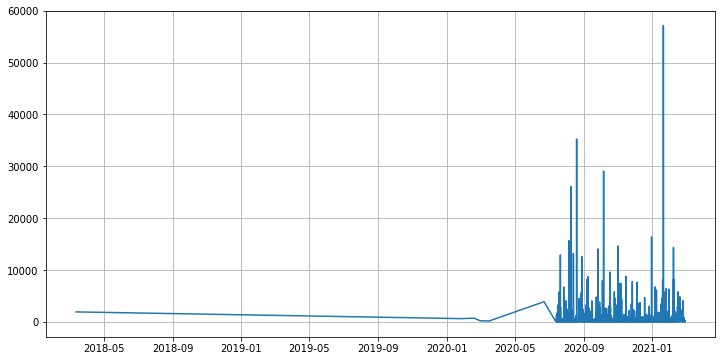

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df.hitsCount)
plt.grid(True)
plt.show()

In [51]:
# df[df.weekday == 0]

In [52]:
df.groupby(['weekday'])['id'].count().values

array([1002,  873,  786,  786,  899,  839,  953])

In [53]:
df.weekday.value_counts().values

array([1002,  953,  899,  873,  839,  786,  786])

In [54]:
df.weekday.value_counts().sort_index()

Friday       1002
Monday        873
Saturday      786
Sunday        786
Thursday      899
Tuesday       839
Wednesday     953
Name: weekday, dtype: int64

In [55]:
df.groupby(['weekday']).count()

id   url  author  commentsCount  favoritesCount  hitsCount  \
weekday                                                                   
Friday     1002  1002    1002           1002            1002       1002   
Monday      873   873     873            873             873        873   
Saturday    786   786     786            786             786        786   
Sunday      786   786     786            786             786        786   
Thursday    899   899     899            899             899        899   
Tuesday     839   839     839            839             839        839   
Wednesday   953   953     953            953             953        953   

           isRepost  likes  subsite  title  ...  author_avatar_url  symbols  \
weekday                                     ...                               
Friday         1002   1002     1002    530  ...               1002     1002   
Monday          873    873      873    463  ...                873      873   
Saturday        786    786      786    383  ...                786      786   
Sunday          786    786      786    374  ...                786      786   
Thursday        899    899      899    456  ...                899      899   
Tuesday         839    839      839    447  ...                839      839   
Wednesday       953    953      953    469  ...                953      953   

           words  images  videos  links  hashtags  exotic_media_type  hour  \
weekday                                                                      
Friday      1002    1002    1002   1002      1002               1002  1002   
Monday       873     873     873    873       873                873   873   
Saturday     786     786     786    786       786                786   786   
Sunday       786     786     786    786       786                786   786   
Thursday     899     899     899    899       899                899   899   
Tuesday      839     839     839    839       839                839   839   
Wednesday    953     953     953    953       953                953   953   

           is_weekend  
weekday                
Friday           1002  
Monday            873  
Saturday          786  
Sunday            786  
Thursday          899  
Tuesday           839  
Wednesday         953  

[7 rows x 27 columns]

<AxesSubplot:>

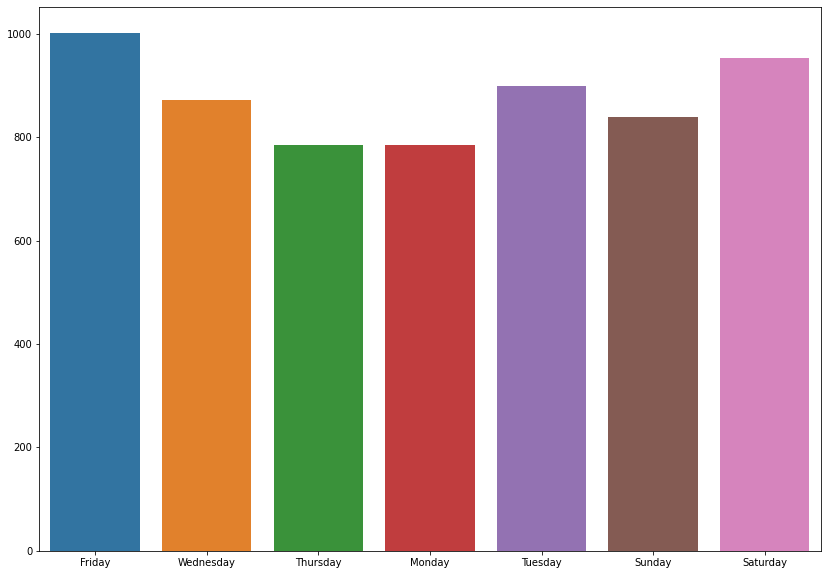

In [56]:
sns.barplot(x=df.weekday.value_counts().index, y=df.groupby(['weekday'])['id'].count().values)

In [57]:
df.reset_index(inplace=True)
df.head()

date      id  \
0 2018-03-12 21:59:15   17110   
1 2020-01-26 20:38:21   97215   
2 2020-02-18 19:11:46  104163   
3 2020-02-29 18:25:10  108055   
4 2020-03-16 10:36:03  113363   

                                                 url  \
0   https://dtf.ru/flood/17110-ne-odin-lish-tip-luny   
1  https://dtf.ru/u/92907-aleksey-fedorov/97215-t...   
2  https://dtf.ru/u/92907-aleksey-fedorov/104163-...   
3  https://dtf.ru/u/92907-aleksey-fedorov/108055-...   
4  https://dtf.ru/u/4810-oleg-kubaneishvili/11336...   

                                              author  commentsCount  \
0  {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...             19   
1  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...             11   
2  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...             39   
3  {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...              7   
4  {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...              5   

   favoritesCount  hitsCount  isRepost  likes            subsite  ... symbols  \
0              32       1946      True     36              –û—Ñ—Ç–æ–ø  ...   11786   
1              47        648      True     56    –ê–ª–µ–∫—Å–µ–π –§—ë–¥–æ—Ä–æ–≤  ...     206   
2              25        740      True     49    –ê–ª–µ–∫—Å–µ–π –§—ë–¥–æ—Ä–æ–≤  ...      92   
3              18        236      True     41    –ê–ª–µ–∫—Å–µ–π –§—ë–¥–æ—Ä–æ–≤  ...     150   
4               8        180      True     15  –û–ª–µ–≥ –ö—É–±–∞–Ω–µ–∏—à–≤–∏–ª–∏  ...    4728   

   words images videos links               hashtags exotic_media_type  hour  \
0   1723     42      3     0                [#long]                 0    21   
1     26     17      0     0               [#anime]                 0    20   
2     12     32      0     0  [#anime, #evangelion]                 0    19   
3     14     19      0     1               [#anime]                 0    18   
4    689     17      0     0                     []                 0    10   

    weekday  is_weekend  
0    Monday           0  
1    Sunday           0  
2   Tuesday           0  
3  Saturday           0  
4    Monday           0  

[5 rows x 29 columns]

In [58]:
df.groupby(['isRepost']).agg({'id': "count"})

id
isRepost      
False     5440
True       698

In [59]:
df.groupby(['isRepost']).agg({'id': "count"})['id']

isRepost
False    5440
True      698
Name: id, dtype: int64

In [60]:
sns.set_theme()
sns.set_palette("husl")

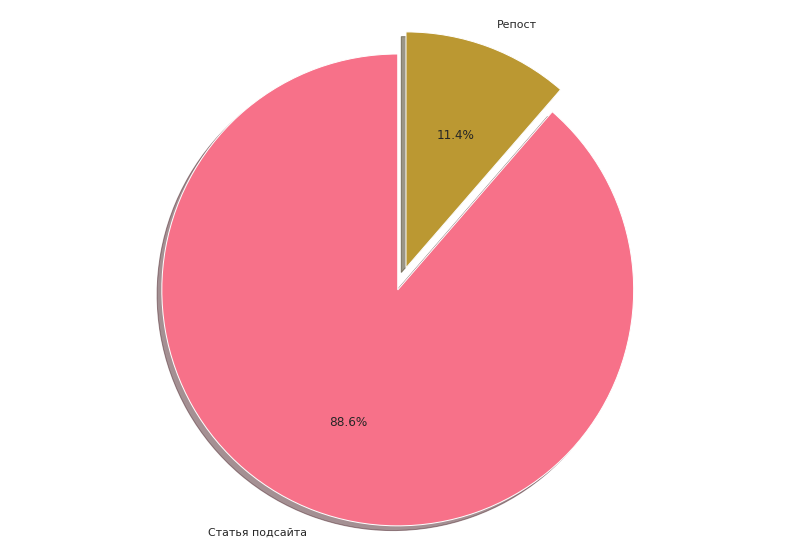

In [61]:
labels = '–°—Ç–∞—Ç—å—è –ø–æ–¥—Å–∞–π—Ç–∞', '–†–µ–ø–æ—Å—Ç'
sizes = df.groupby(['isRepost']).agg({'id': "count"})['id'].values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.show()

<AxesSubplot:xlabel='symbols'>

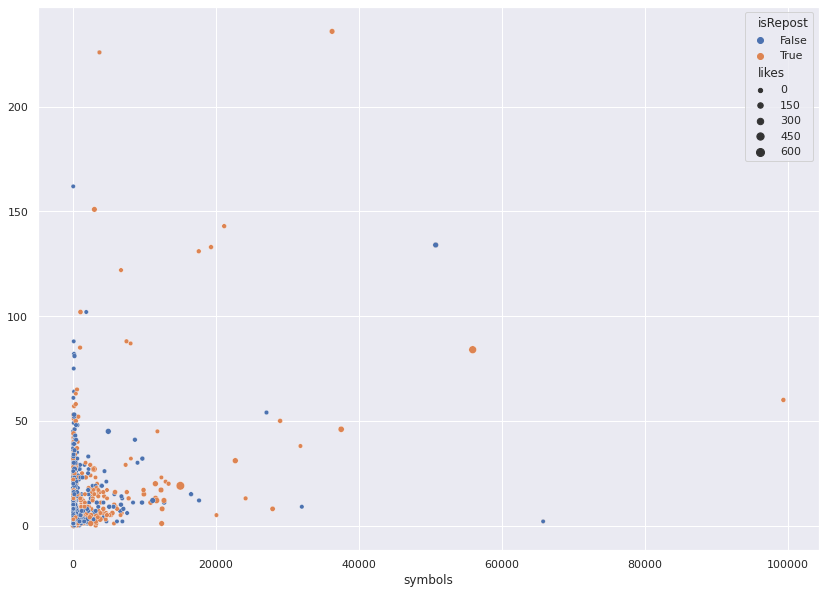

In [62]:
sns.set_theme()
sns.color_palette()

sns.scatterplot(x=df.symbols, size=df.likes, hue='isRepost', 
                y=sum([df.images, df.videos, df.links]), data=df)

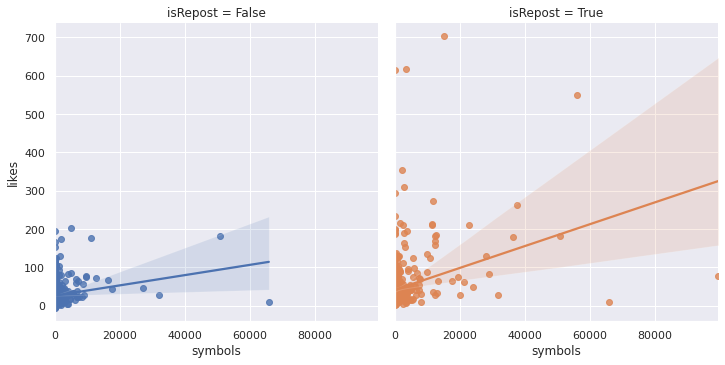

In [63]:
sns.lmplot(data=df, x='symbols', y='likes', col='isRepost', hue='isRepost')

In [64]:
sum((df.isRepost == True) / len(df.isRepost))

0.11371782339524157

In [65]:
tmp = df.groupby(['author_name'])['author_name'].count().sort_values(ascending=False).head(20)

In [66]:
tmp

author_name
–ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è                 748
Layben                            627
–ì—É—Å—å –•–º—É—Ä—ã–π                       470
Suzume-sama said OKawaii Koto     308
Diego Paw                         302
–§–∞–Ω–∞—Ç –ê–Ω–∏ –¢–µ–π–ª–æ—Ä-–î–∂–æ–π             270
Just No Chill                     237
Pray for Megumin                  230
–•–∞—Å–∞–≥–∏                            152
mindtered                         112
Koda                              106
Oleg Mattewho                      94
–í–∏–∞–±—É                              91
–ê–ª–µ–∫—Å–µ–π –ö—É–¥—Ä—è–≤—Ü–µ–≤                  80
–ê–Ω–∏–º–µ–º–∞–Ω–∏—è                         76
deGoose                            53
Saher                              53
–†–∂–æ–±–µ–∫ –ü—à–µ–∂–¥–∑–∏–Ω—Å–∫–∏                 49
–ù–µ–∫—Å—Ç–≥–µ–Ω–æ–≤–∞ –≠–ª–æ–π –ü–ª—ç–π—Å—Ç—ç–π—à–æ–≤–Ω–∞     49
Zerescas                           47
Name: author_name, dtype: int64

https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn

https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

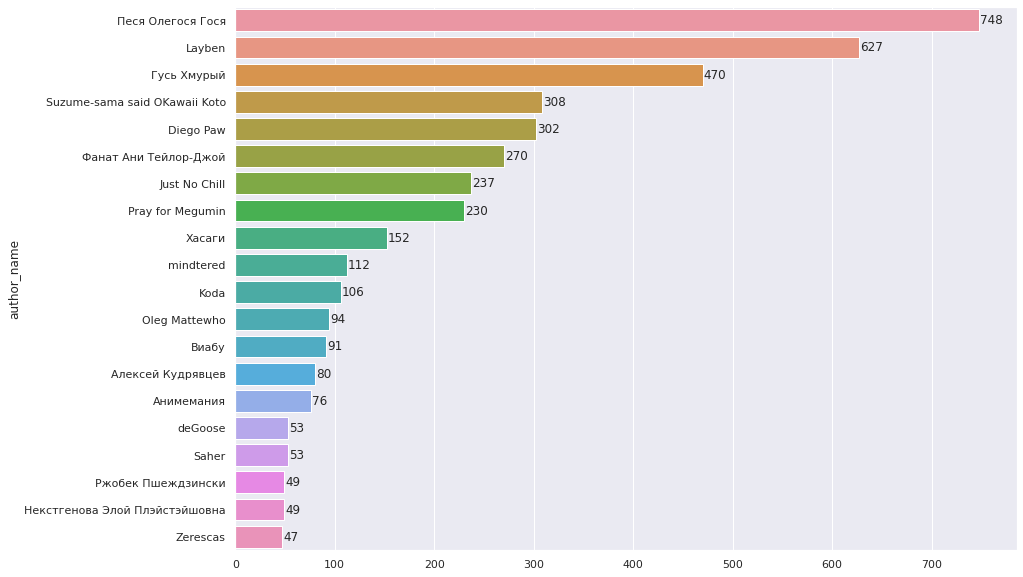

In [67]:
f = sns.barplot(x=tmp.values, y=tmp.index)
ax = f
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/40066089/apply-images-to-pyplot-python-bar-graphs

# –°–£–ü–ï–†_–í–ê–ñ–ù–û!

```python
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

labels = ['CW', 'CV', 'GW', 'SX', 'DO']
colors = ['crimson', 'dodgerblue', 'teal', 'limegreen', 'gold']
values = 30 + np.random.randint(5, 20, len(labels)).cumsum()

height = 0.9
plt.barh(y=labels, width=values, height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    # load the image corresponding to label into img
    # with cbook.get_sample_data('ada.png') as image_file:
    #    img = plt.imread(image_file)
    response = requests.get(f'https://www.countryflags.io/{label}/flat/64.png')
    img = plt.imread(BytesIO(response.content))
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()
```

In [68]:
df.loc[:, 'author']

0       {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...
1       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
2       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
3       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
4       {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...
                              ...                        
6133    {'id': 154947, 'url': 'https://dtf.ru/u/154947...
6134    {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...
6135    {'id': 169967, 'url': 'https://dtf.ru/u/169967...
6136    {'id': 252726, 'url': 'https://dtf.ru/u/252726...
6137    {'id': 262818, 'url': 'https://dtf.ru/u/262818...
Name: author, Length: 6138, dtype: object

In [69]:
# df.loc[:, 'author'][6001] # –¥–ª—è timeseries-–∏–Ω–¥–µ–∫—Å–∞

In [70]:
df.loc[6001, 'author']

{'id': 124435,
 'url': 'https://dtf.ru/u/124435-suzume-sama-said-okawaii-koto',
 'name': 'Suzume-sama said OKawaii Koto',
 'type': 1,
 'avatar': {'type': 'image',
  'data': {'uuid': '1315d174-7208-5a30-8ccf-fa36e74ba0b0',
   'width': 650,
   'height': 651,
   'size': 59448,
   'type': 'png',
   'color': 'f270a3',
   'hash': '8484180509287270',
   'external_service': []}},
 'avatar_url': 'https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/',
 'is_online': False,
 'is_verified': False,
 'is_subscribed': False}

In [71]:
df.author_avatar_url

0       https://leonardo.osnova.io/57371154-8c4c-5686-...
1       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
2       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
3       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
4       https://leonardo.osnova.io/528babea-0dfc-444b-...
                              ...                        
6133    https://leonardo.osnova.io/c29d8c44-0073-48cc-...
6134    https://leonardo.osnova.io/5dded09e-5816-5b52-...
6135    https://leonardo.osnova.io/199de206-2dfc-57ee-...
6136    https://leonardo.osnova.io/9d381161-d030-561c-...
6137    https://leonardo.osnova.io/3d85a2af-3745-5c08-...
Name: author_avatar_url, Length: 6138, dtype: object

In [72]:
tmp = df.groupby(['author_avatar_url'])[['id', ]].count().sort_values(by="id", ascending=False).head(20) #\
#.count().sort_values(ascending=False).head(20)
# by="author_name"
tmp

id
author_avatar_url                                      
https://leonardo.osnova.io/b6f745b6-3963-56d5-9...  748
https://leonardo.osnova.io/7fec5e46-2507-5dcd-9...  627
https://leonardo.osnova.io/8fd51f8a-d2eb-2130-8...  470
https://leonardo.osnova.io/1315d174-7208-5a30-8...  308
https://leonardo.osnova.io/7df667af-003c-502d-a...  302
https://leonardo.osnova.io/8cc8cb1e-f454-54f3-a...  270
https://leonardo.osnova.io/199de206-2dfc-57ee-b...  237
https://leonardo.osnova.io/99677e0a-6adb-5b89-8...  230
https://leonardo.osnova.io/d1119c29-41a3-5997-9...  152
https://leonardo.osnova.io/a887eec3-527b-5d5f-9...  112
https://leonardo.osnova.io/c29d8c44-0073-48cc-1...  106
https://leonardo.osnova.io/fe59528c-8e0d-52fc-8...   94
https://leonardo.osnova.io/cb2d9d10-284b-5b36-b...   91
https://leonardo.osnova.io/e9c89a58-85f8-7a69-c...   80
https://leonardo.osnova.io/852a0194-4ce1-5c68-8...   76
https://leonardo.osnova.io/5edaf890-f66c-5a44-b...   53
https://leonardo.osnova.io/9d381161-d030-561c-a...   53
https://leonardo.osnova.io/4aeed29d-c823-5533-9...   49
https://leonardo.osnova.io/c940dcec-6621-db42-e...   49
https://leonardo.osnova.io/44cfef11-5dee-3bb0-b...   47

In [73]:
tmp.index

Index(['https://leonardo.osnova.io/b6f745b6-3963-56d5-9c3c-2d6327a0dc53/',
       'https://leonardo.osnova.io/7fec5e46-2507-5dcd-9d6d-06827fe1ec5b/',
       'https://leonardo.osnova.io/8fd51f8a-d2eb-2130-8b66-92029cde17c1/',
       'https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/',
       'https://leonardo.osnova.io/7df667af-003c-502d-a672-56ab2918c9a4/',
       'https://leonardo.osnova.io/8cc8cb1e-f454-54f3-a19f-1622a11a6cd2/',
       'https://leonardo.osnova.io/199de206-2dfc-57ee-b387-1df29e145d6c/',
       'https://leonardo.osnova.io/99677e0a-6adb-5b89-8177-9cd3acd32185/',
       'https://leonardo.osnova.io/d1119c29-41a3-5997-96f3-628c0ee5296a/',
       'https://leonardo.osnova.io/a887eec3-527b-5d5f-96a2-5ab87fccb3e7/',
       'https://leonardo.osnova.io/c29d8c44-0073-48cc-10f2-7d175ab7d94c/',
       'https://leonardo.osnova.io/fe59528c-8e0d-52fc-830f-f675e2860162/',
       'https://leonardo.osnova.io/cb2d9d10-284b-5b36-b07c-659371c8f882/',
       'https://leonardo.

In [74]:
# labels
# values

# –ú–ï–ì–ê-–í–ê–ñ–ù–û!

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

In [75]:
# –ü–µ—Ä–≤—ã–π, –Ω–µ—É–¥–∞—á–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç

# import requests
# from PIL import Image
# from io import BytesIO

# labels = tmp.index[:5]
# colors = ['tan', 'peru', 'grey', 'orchid', 'darkred']
# values = tmp.values.flatten()[:5]

# height = 0.9
# plt.barh(y=tmp.index[:5], width=tmp.values.flatten()[:5], height=height, color=colors, align='center')

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

https://stackoverflow.com/questions/32059397/pandas-groupby-without-turning-grouped-by-column-into-index

In [76]:
tmp_2 = df.groupby(['author_name','author_avatar_url'], as_index=False).count() \
.sort_values(by="id", ascending=False).head(20).iloc[:, [0,1,3]]
tmp_2

author_name  \
341               –ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è   
105                          Layben   
276                     –ì—É—Å—å –•–º—É—Ä—ã–π   
172   Suzume-sama said OKawaii Koto   
47                        Diego Paw   
368           –§–∞–Ω–∞—Ç –ê–Ω–∏ –¢–µ–π–ª–æ—Ä-–î–∂–æ–π   
91                    Just No Chill   
142                Pray for Megumin   
371                          –•–∞—Å–∞–≥–∏   
208                       mindtered   
102                            Koda   
137                   Oleg Mattewho   
260                           –í–∏–∞–±—É   
233               –ê–ª–µ–∫—Å–µ–π –ö—É–¥—Ä—è–≤—Ü–µ–≤   
246                      –ê–Ω–∏–º–µ–º–∞–Ω–∏—è   
152                           Saher   
199                         deGoose   
330  –ù–µ–∫—Å—Ç–≥–µ–Ω–æ–≤–∞ –≠–ª–æ–π –ü–ª—ç–π—Å—Ç—ç–π—à–æ–≤–Ω–∞   
353              –†–∂–æ–±–µ–∫ –ü—à–µ–∂–¥–∑–∏–Ω—Å–∫–∏   
189                        Zerescas   

                                     author_avatar_url   id  
341  https://leonardo.osnova.io/b6f745b6-3963-56d5-...  748  
105  https://leonardo.osnova.io/7fec5e46-2507-5dcd-...  627  
276  https://leonardo.osnova.io/8fd51f8a-d2eb-2130-...  470  
172  https://leonardo.osnova.io/1315d174-7208-5a30-...  308  
47   https://leonardo.osnova.io/7df667af-003c-502d-...  302  
368  https://leonardo.osnova.io/8cc8cb1e-f454-54f3-...  270  
91   https://leonardo.osnova.io/199de206-2dfc-57ee-...  237  
142  https://leonardo.osnova.io/99677e0a-6adb-5b89-...  230  
371  https://leonardo.osnova.io/d1119c29-41a3-5997-...  152  
208  https://leonardo.osnova.io/a887eec3-527b-5d5f-...  112  
102  https://leonardo.osnova.io/c29d8c44-0073-48cc-...  106  
137  https://leonardo.osnova.io/fe59528c-8e0d-52fc-...   94  
260  https://leonardo.osnova.io/cb2d9d10-284b-5b36-...   91  
233  https://leonardo.osnova.io/e9c89a58-85f8-7a69-...   80  
246  https://leonardo.osnova.io/852a0194-4ce1-5c68-...   76  
152  https://leonardo.osnova.io/9d381161-d030-561c-...   53  
199  https://leonardo.osnova.io/5edaf890-f66c-5a44-...   53  
330  https://leonardo.osnova.io/4aeed29d-c823-5533-...   49  
353  https://leonardo.osnova.io/c940dcec-6621-db42-...   49  
189  https://leonardo.osnova.io/44cfef11-5dee-3bb0-...   47

In [77]:
tmp_2.author_name

341                 –ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è
105                            Layben
276                       –ì—É—Å—å –•–º—É—Ä—ã–π
172     Suzume-sama said OKawaii Koto
47                          Diego Paw
368             –§–∞–Ω–∞—Ç –ê–Ω–∏ –¢–µ–π–ª–æ—Ä-–î–∂–æ–π
91                      Just No Chill
142                  Pray for Megumin
371                            –•–∞—Å–∞–≥–∏
208                         mindtered
102                              Koda
137                     Oleg Mattewho
260                             –í–∏–∞–±—É
233                 –ê–ª–µ–∫—Å–µ–π –ö—É–¥—Ä—è–≤—Ü–µ–≤
246                        –ê–Ω–∏–º–µ–º–∞–Ω–∏—è
152                             Saher
199                           deGoose
330    –ù–µ–∫—Å—Ç–≥–µ–Ω–æ–≤–∞ –≠–ª–æ–π –ü–ª—ç–π—Å—Ç—ç–π—à–æ–≤–Ω–∞
353                –†–∂–æ–±–µ–∫ –ü—à–µ–∂–¥–∑–∏–Ω—Å–∫–∏
189                          Zerescas
Name: author_name, dtype: object

In [78]:
tmp_2.id[:5][::-1]

47     302
172    308
276    470
105    627
341    748
Name: id, dtype: int64

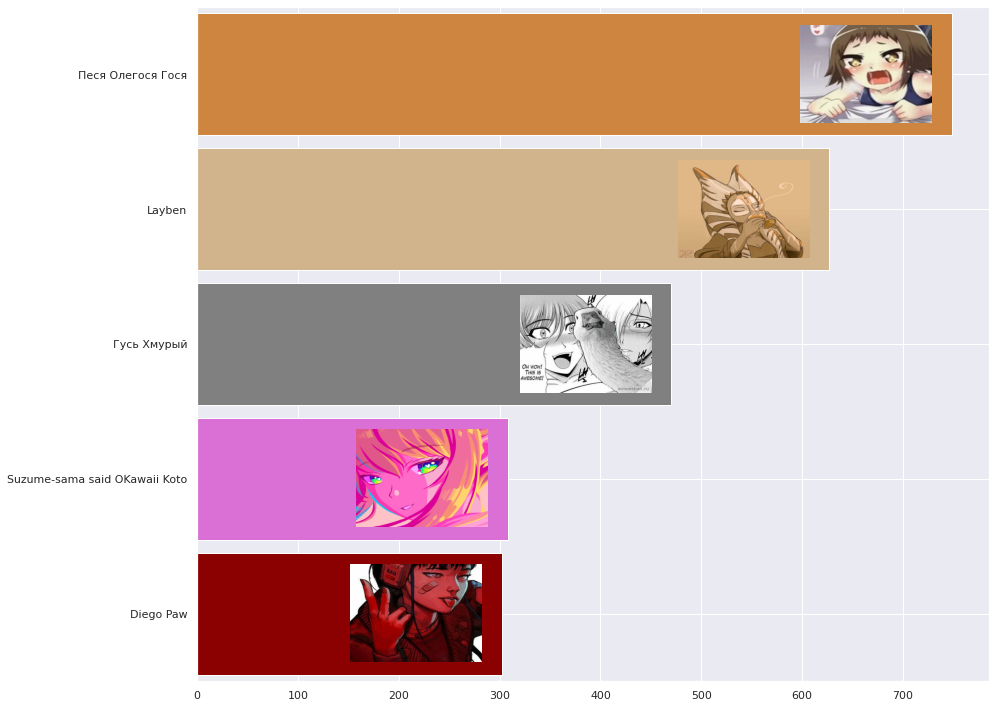

In [79]:
import requests
from PIL import Image
from io import BytesIO

labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] #.flatten()[:5]

height = 0.9
plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [80]:
ax.patches

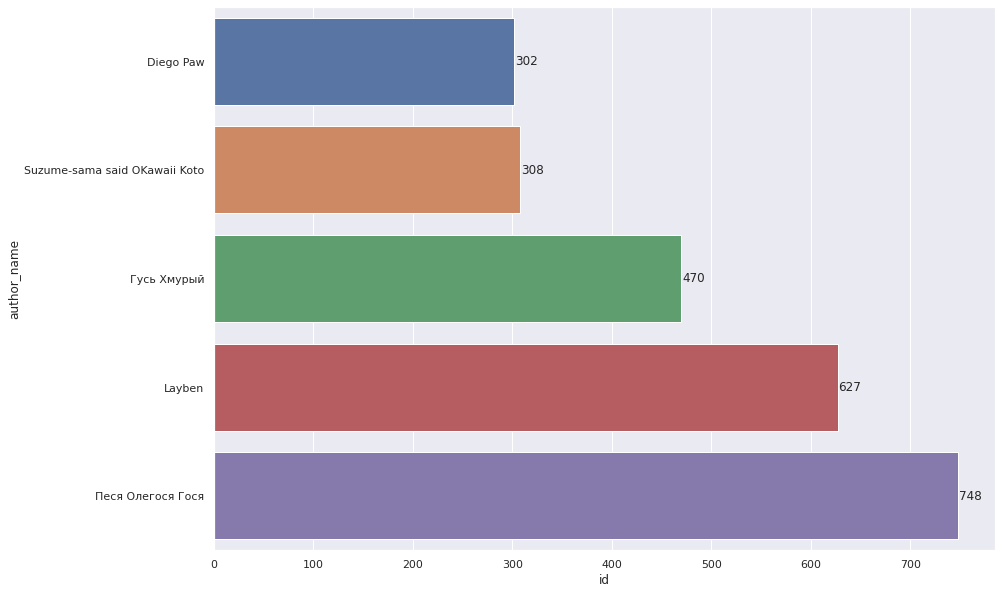

In [81]:
labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] #.flatten()[:5]

height = 0.9
f = sns.barplot(y=tmp_2.author_name[:5][::-1], x=tmp_2.id[:5][::-1])
ax = f

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

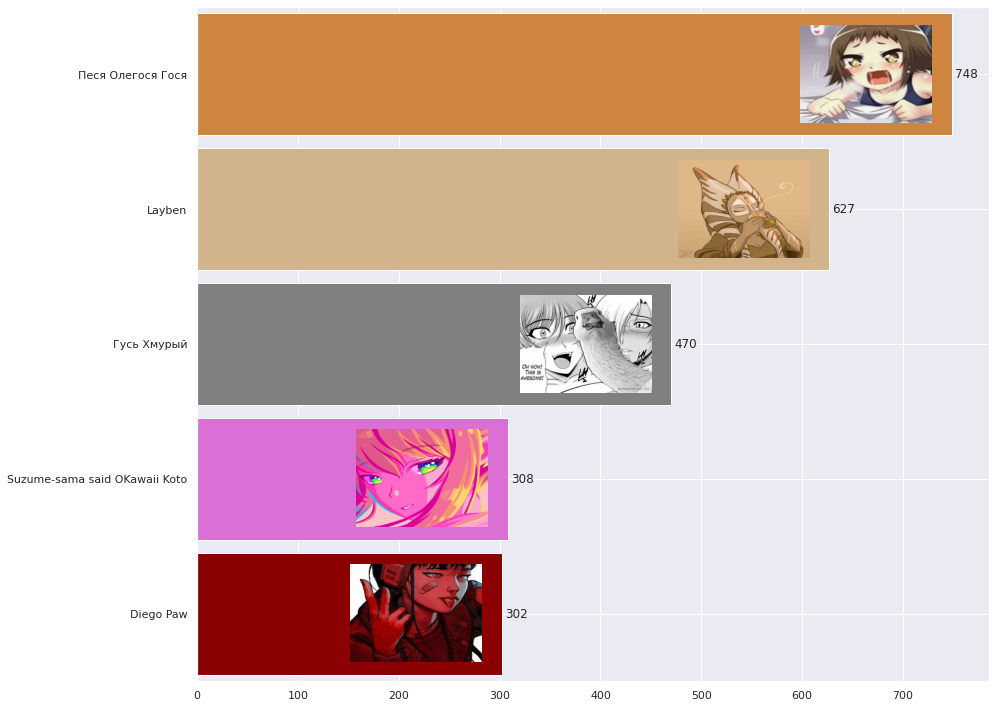

In [82]:
import requests
from PIL import Image
from io import BytesIO

labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] 

height = 0.9
plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 3, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [83]:
df.groupby(['author_name']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes       
                              count   max    sum
author_name                                     
–ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è               748   130  21862
Layben                          627    90  12403
–ì—É—Å—å –•–º—É—Ä—ã–π                     470    99  13566
Suzume-sama said OKawaii Koto   308   114  11285
Diego Paw                       302   123   6813
...                             ...   ...    ...
Vladislav Hollow                  1    28     28
Wilfred                           1   123    123
Yuriy                             1   169    169
Zhenya Pavlov                     1    16     16
üí±                                 1    10     10

[383 rows x 3 columns]

In [84]:
df.columns

Index(['date', 'id', 'url', 'author', 'commentsCount', 'favoritesCount',
       'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 'blocks',
       'repost', 'stackedRepostsAuthors', 'media_content_types', 'author_name',
       'author_type', 'author_avatar_url', 'symbols', 'words', 'images',
       'videos', 'links', 'hashtags', 'exotic_media_type', 'hour', 'weekday',
       'is_weekend'],
      dtype='object')

<AxesSubplot:>

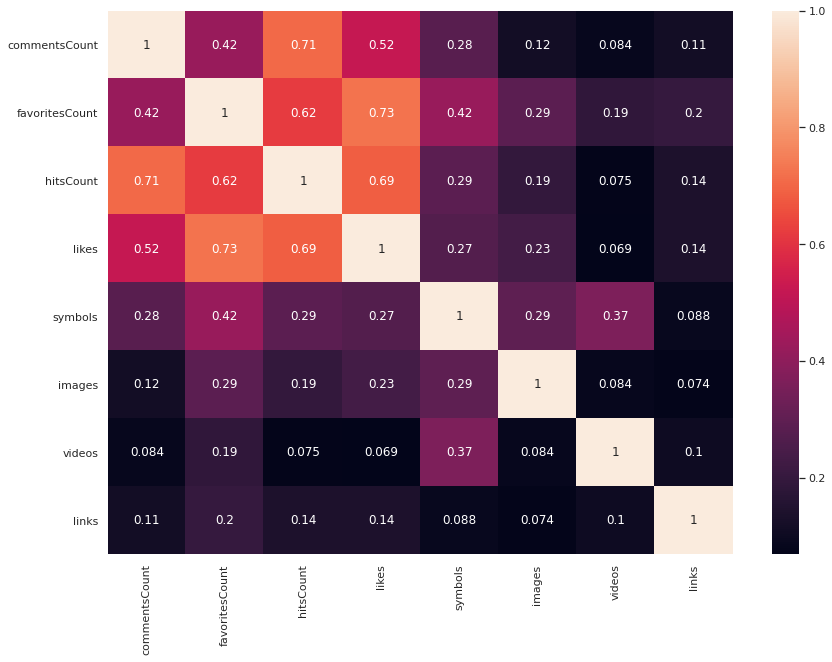

In [85]:
sns.heatmap(df.loc[:, ['commentsCount', 'favoritesCount', 'hitsCount', 
                       'likes', 'symbols', 'images', 'videos', 'links']].corr(), annot=True)

In [86]:
df.groupby(['author_name', 'isRepost']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes       
                                      count   max    sum
author_name                  isRepost                   
–ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è            False      737   130  21485
Layben                       False      621    90  12230
–ì—É—Å—å –•–º—É—Ä—ã–π                  False      466    99  13349
Diego Paw                    False      287   123   6494
–§–∞–Ω–∞—Ç –ê–Ω–∏ –¢–µ–π–ª–æ—Ä-–î–∂–æ–π        False      251   153   5746
...                                     ...   ...    ...
–ê—Ä—Ç—ë–º –•—Ä–æ–º–æ–≤                 False        1    37     37
–ê—Ä—Ç—ë–º –ß—É–π–∫–∏–Ω                 False        1    38     38
                             True         1    21     21
–ë–∞–±–∞–π–µ—á–∫–∞ –ö–ª–æ—É–Ω–µ—Å—Å–∞ DTF –º–∏—Ä–∞ True         1    66     66
üí±                            False        1    10     10

[469 rows x 3 columns]

<AxesSubplot:xlabel='symbols'>

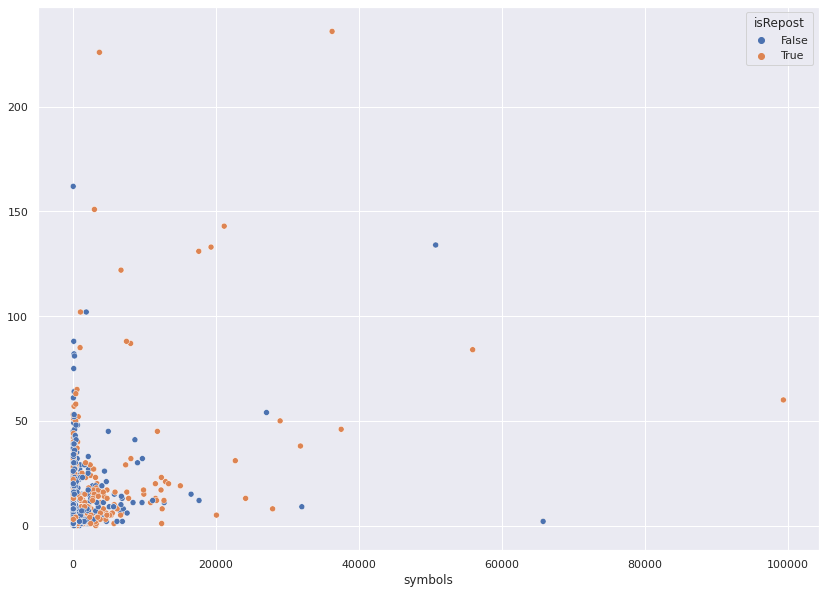

In [87]:
sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='isRepost', data=df)

<AxesSubplot:xlabel='commentsCount', ylabel='Count'>

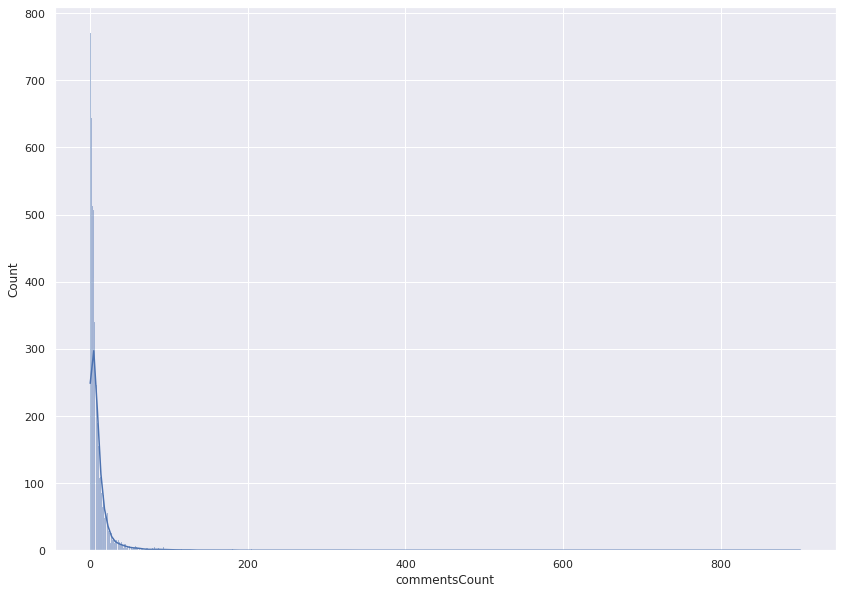

In [128]:
sns.histplot(x = df.commentsCount, kde=True)

<AxesSubplot:xlabel='hitsCount', ylabel='Count'>

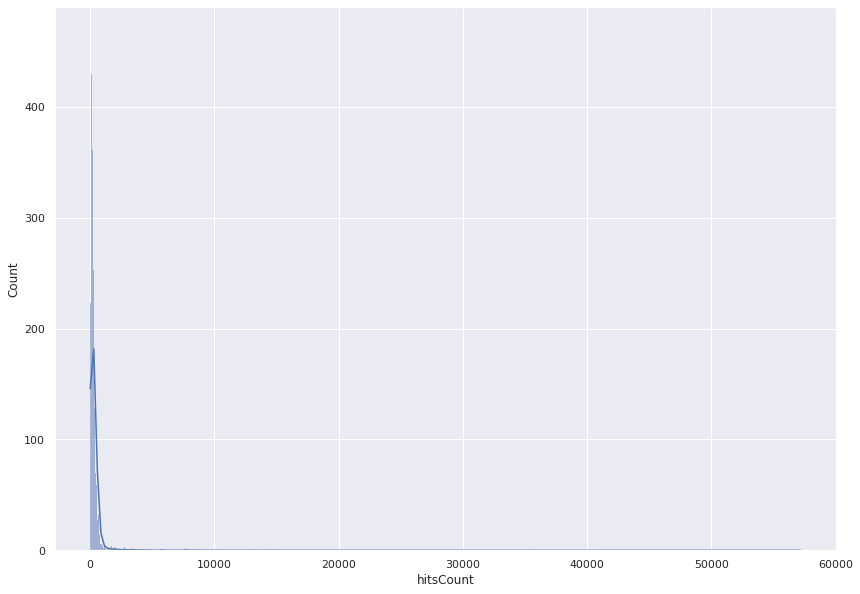

In [107]:
sns.histplot(df.hitsCount, kde=True)

<AxesSubplot:xlabel='likes', ylabel='Count'>

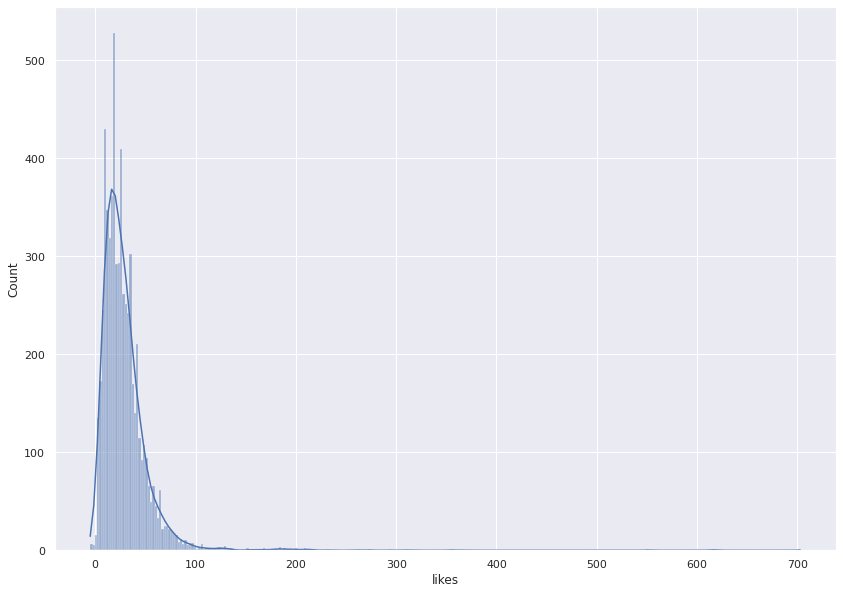

In [125]:
sns.histplot(df.likes, kde=True)

<AxesSubplot:xlabel='isRepost', ylabel='likes'>

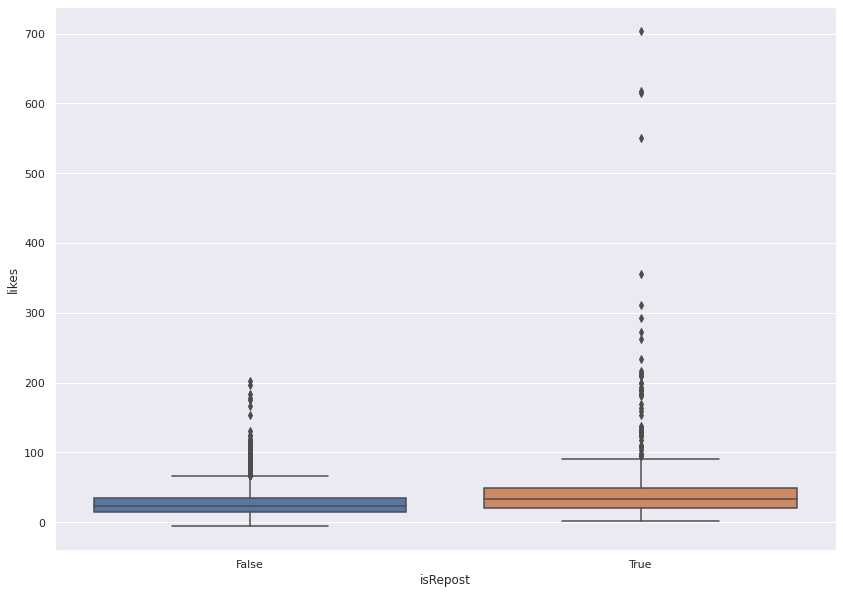

In [90]:
sns.boxplot(data=df, x="isRepost", y="likes")

In [91]:
a = df.groupby(['author_name']).agg({'id': 'count'})
a[a['id'] > 1].sort_values(by='id', ascending=False)

id
author_name                       
–ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è              748
Layben                         627
–ì—É—Å—å –•–º—É—Ä—ã–π                    470
Suzume-sama said OKawaii Koto  308
Diego Paw                      302
...                            ...
–ú–∞–∫—Å–∏–º –ú–µ—Ä–∑–ª–∏–∫–∏–Ω                 2
Gacha Hell                       2
–ú–∞—Ä–∫ –í–æ–ª—å—Å–∫–∏–π                    2
Fred Lemuer                      2
2B OR NOT 2B                     2

[209 rows x 1 columns]

In [92]:
a[a['id'] > 100].index

Index(['Diego Paw', 'Just No Chill', 'Koda', 'Layben', 'Pray for Megumin',
       'Suzume-sama said OKawaii Koto', 'mindtered', '–ì—É—Å—å –•–º—É—Ä—ã–π',
       '–ü–µ—Å—è –û–ª–µ–≥–æ—Å—è –ì–æ—Å—è', '–§–∞–Ω–∞—Ç –ê–Ω–∏ –¢–µ–π–ª–æ—Ä-–î–∂–æ–π', '–•–∞—Å–∞–≥–∏'],
      dtype='object', name='author_name')

In [93]:
tmp = df.groupby(['author_name']).agg({'id': 'count'})

In [94]:
# sns.boxplot(data=df, y="author_name", x="likes")

<AxesSubplot:ylabel='likes'>

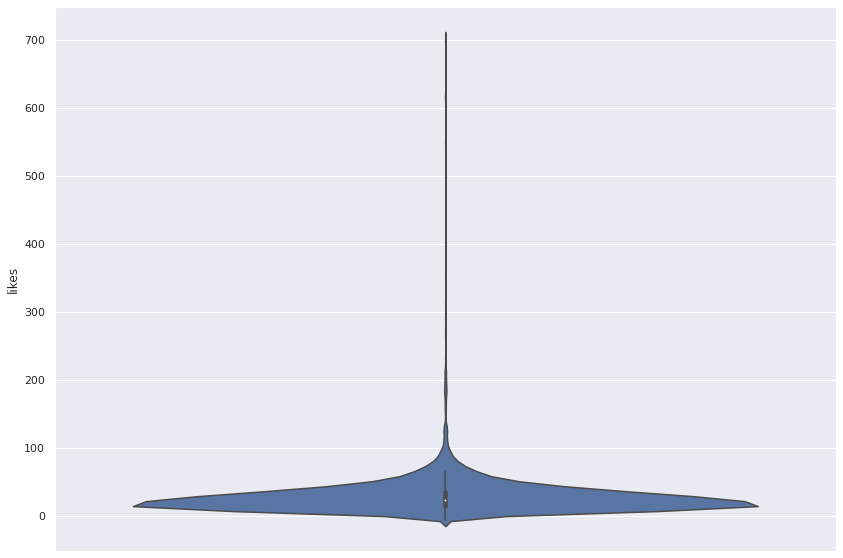

In [95]:
sns.violinplot(y=df.likes)

In [96]:
from plotnine import *
from plotnine.data import *

https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html?highlight=violin#violins-boxes-points-and-lines

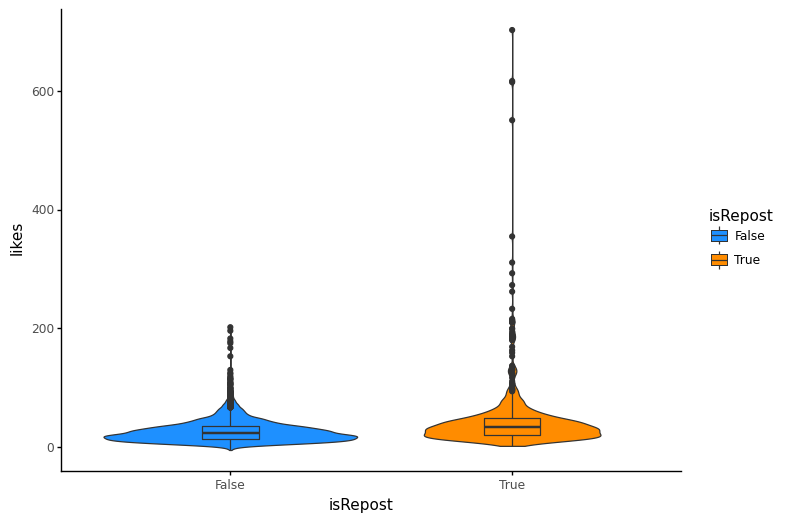

<ggplot: (8752979896037)>

In [97]:
(ggplot(df, aes(x=df.isRepost, y=df.likes, fill=df.isRepost)) + geom_violin(show_legend=False) + geom_boxplot(width = .2)
+ scale_fill_manual(values=['dodgerblue', 'darkorange'])
+ theme_classic()
+ theme(figure_size=(8, 6))
)

In [98]:
subs = pd.read_csv(PATH + "data_test_subs_jp.csv", index_col=0)
subs

id                                                url  \
0  655467  https://dtf.ru/s/japan/655467-bolshe-gasyapono...   
1  653734  https://dtf.ru/s/japan/653734-festival-fudzi-s...   
2  650909  https://dtf.ru/s/travel/650909-10-potryasayush...   
3  651835          https://dtf.ru/s/weaboo/651835-some-japan   
4  646467                https://dtf.ru/u/286845-digo/646467   
0  645864       https://dtf.ru/s/japan/645864-sady-hamarikyu   
1  634735  https://dtf.ru/anime/634735-v-anime-devushka-n...   
2  641673  https://dtf.ru/life/641673-v-yaponii-naznachen...   
3  641437  https://dtf.ru/flood/641437-v-yaponii-zemletry...   
4  641304  https://dtf.ru/s/japan/641304-sovety-turistu-c...   
0  639722  https://dtf.ru/s/travel/639722-bambukovyy-les-...   
1  637899  https://dtf.ru/s/travel/637899-nacionalnyy-par...   
2  638247         https://dtf.ru/s/japan/638247-eto-ne-anime   
3  637650                      https://dtf.ru/s/japan/637650   
4  635622  https://dtf.ru/s/weaboo/635622-0-0-interesnyy-...   

                                              author  \
0  {'id': 27850, 'url': 'https://dtf.ru/u/27850-d...   
1  {'id': 27850, 'url': 'https://dtf.ru/u/27850-d...   
2  {'id': 329335, 'url': 'https://dtf.ru/s/travel...   
3  {'id': 124435, 'url': 'https://dtf.ru/u/124435...   
4  {'id': 286845, 'url': 'https://dtf.ru/u/286845...   
0  {'id': 27850, 'url': 'https://dtf.ru/u/27850-d...   
1  {'id': 256351, 'url': 'https://dtf.ru/crunchyr...   
2  {'id': 22393, 'url': 'https://dtf.ru/u/22393-s...   
3  {'id': 314019, 'url': 'https://dtf.ru/u/314019...   
4  {'id': 27850, 'url': 'https://dtf.ru/u/27850-d...   
0  {'id': 329335, 'url': 'https://dtf.ru/s/travel...   
1  {'id': 329335, 'url': 'https://dtf.ru/s/travel...   
2  {'id': 27850, 'url': 'https://dtf.ru/u/27850-d...   
3  {'id': 257500, 'url': 'https://dtf.ru/u/257500...   
4  {'id': 124435, 'url': 'https://dtf.ru/u/124435...   

                                              badges  commentsCount  \
0  [{'type': 'top', 'text': '–Ø–ø–æ–Ω–∏—è', 'background...              2   
1  [{'type': 'top', 'text': '–Ø–ø–æ–Ω–∏—è', 'background...              1   
2  [{'type': 'top', 'text': '–ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è', 'backg...              5   
3  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...              9   
4  [{'type': 'top', 'text': 'Digo', 'background':...             19   
0  [{'type': 'top', 'text': '–Ø–ø–æ–Ω–∏—è', 'background...              0   
1  [{'type': 'top', 'text': '–ê–Ω–∏–º–µ', 'background'...            945   
2  [{'type': 'top', 'text': '–ñ–∏–∑–Ω—å', 'background'...            292   
3  [{'type': 'top', 'text': '–û—Ñ—Ç–æ–ø', 'background'...             63   
4  [{'type': 'top', 'text': '–Ø–ø–æ–Ω–∏—è', 'background...             17   
0  [{'type': 'top', 'text': '–ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è', 'backg...              3   
1  [{'type': 'top', 'text': '–ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è', 'backg...              5   
2  [{'type': 'top', 'text': '–Ø–ø–æ–Ω–∏—è', 'background...              2   
3  [{'type': 'top', 'text': '–Ø–ø–æ–Ω–∏—è', 'background...              4   
4  [{'type': 'top', 'text': '–í–∏–∞–±—É', 'background'...             21   

   commentsSeenCount  favoritesCount  \
0                NaN               5   
1                NaN               6   
2                NaN              18   
3                NaN              14   
4                NaN              15   
0                NaN              13   
1                NaN             793   
2                NaN              86   
3                NaN              18   
4                NaN              50   
0                NaN              24   
1                NaN              19   
2                NaN               6   
3                NaN               4   
4                NaN               5   

                                               cover        date  \
0  {'additionalData': {'size': 576727, 'type': 'j...  1614351266   
1  {'additionalData': {'size': 534138, 'type': 'j...  1614265081   
2  {'addi

In [99]:
subs.title

0                      –ë–æ–ª—å—à–µ –≥–∞—Å—è–ø–æ–Ω–æ–≤ –±–æ–≥—É –≥–∞—Å—è–ø–æ–Ω–æ–≤
1                          –§–µ—Å—Ç–∏–≤–∞–ª—å –§—É–¥–∑–∏ –°–∏–±–∞-—Å–∞–∫—É—Ä–∞
2    10 –ø–æ—Ç—Ä—è—Å–∞—é—â–∏—Ö –º—É–∑–µ–µ–≤, –ø–æ—Å–≤—è—â–µ–Ω–Ω—ã—Ö –µ–¥–µ –∏ –Ω–∞–ø–∏—Ç–∫–∞–º
3                                          _some:Japan
4                                                  NaN
0                                        –°–∞–¥—ã –•–∞–º–∞—Ä–∏–∫—é
1    –í –∞–Ω–∏–º–µ ¬´–î–µ–≤—É—à–∫–∞ –Ω–∞–ø—Ä–æ–∫–∞—Ç¬ª –ø–∞—Ä–µ–Ω—å –ø–ª–∞—Ç–∏—Ç –¥–µ–≤—É—à...
2       –í –Ø–ø–æ–Ω–∏–∏ –Ω–∞–∑–Ω–∞—á–µ–Ω –º–∏–Ω–∏—Å—Ç—Ä –ø–æ –¥–µ–ª–∞–º –æ–¥–∏–Ω–æ—á–µ—Å—Ç–≤–∞
3          –í –Ø–ø–æ–Ω–∏–∏ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–µ –º–∞–≥–Ω–∏—Ç—É–¥–æ–π 7,2 –±–∞–ª–ª–∞
4    –°–æ–≤–µ—Ç—ã —Ç—É—Ä–∏—Å—Ç—É: —á—Ç–æ –≤–∑—è—Ç—å –≤ –Ø–ø–æ–Ω–∏—é –≤ —Ä–∞–∑–Ω—ã–µ —Å–µ...
0                –ë–∞–º–±—É–∫–æ–≤—ã–π –ª–µ—Å –°–∞–≥–∞–Ω–æ –≤ –ö–∏–æ—Ç–æ, –Ø–ø–æ–Ω–∏—è
1                     –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∫ –•–∏—Ç–∞—á–∏, –Ø–ø–æ–Ω–∏—è
2                        

In [100]:
# df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))
# df